# An open-sourced comprehensive Monte-Carlo-aided toolkit for statistics

<hr/>

The Monte Carlo method provides an intuitive and promising didactic tool for probability and statistics-related courses. This notebook demostrates an open-sourced Python toolkit (pip install mc-tk). It contains three sub-modules. (1) The “mc.experiments” module provides simulations for classical numeric or probability problems, e.g., Buffon’s needle puzzle and the locker problem. (2) “mc.distributions” provides simulations to study commonly used distributions, e.g., exponential, Poisson, Zipf. For each MC experiment, both the observed histogram and theoretical density function are provided for comparison. (3) “mc.samplings” illustrates the sampling distribution of test statistics, e.g., the chi-squared statistic in the GOF test and ANOVA’s F statistic. 

## Install

In [1]:
!pip install mc-tk
%matplotlib inline

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


## Functionality

experiments.py - provide simulations for solving numeric or probability problems, e.g., solving pi, calculating lottery expectations, etc.     
distributions.py - provide simulations for commonly used distributions, e.g., a sudden death game will produce the exponential distribution, the paper clip experiment will produce the zipf distribution, etc.     
samplings.py - used to verify the statistic / sampling distribution of commonly used hypothesis tests. e.g., the statistic of chi-squared GOF test follows the chisquare distribution. the statistic for ANOVA follows a F distribution, etc.

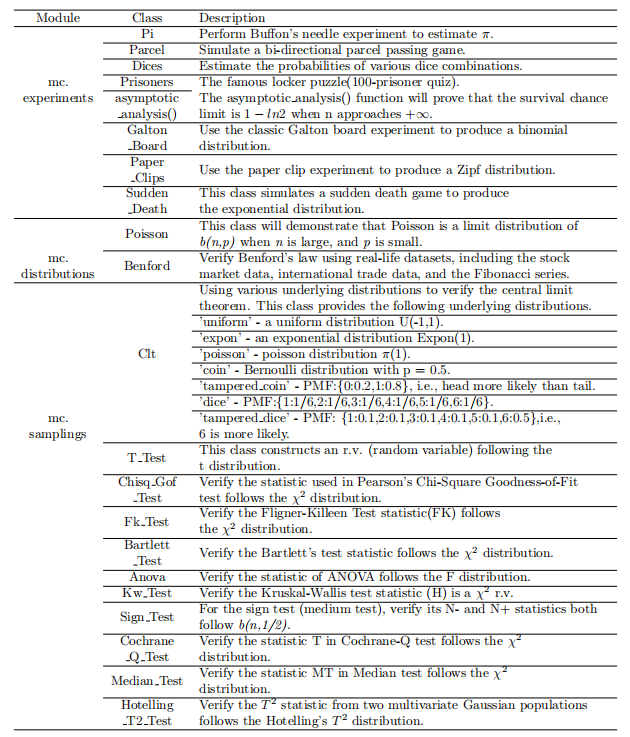

<div title = "The justification for a Monte Carlo method lies in the law of large numbers." />

# Demonstrate all the classes with the default params

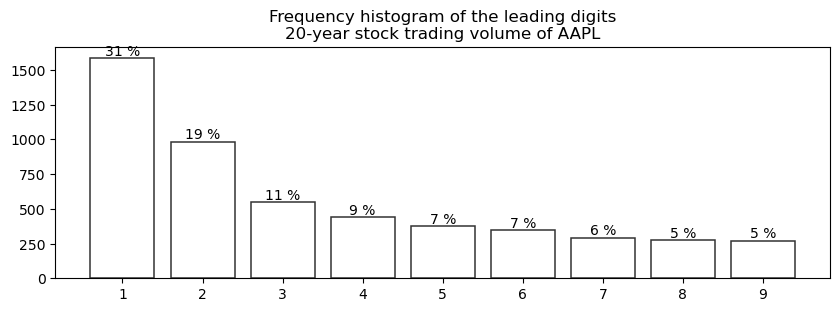

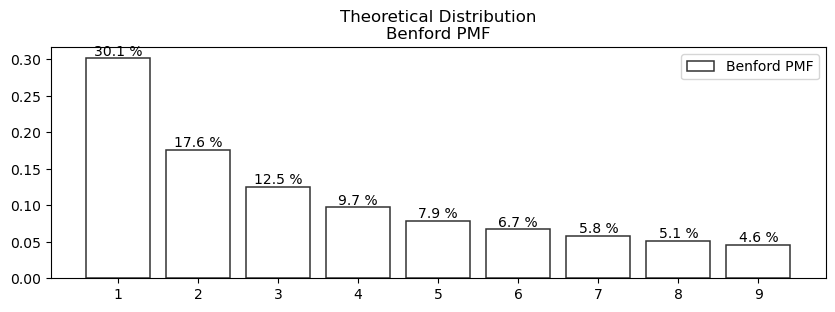

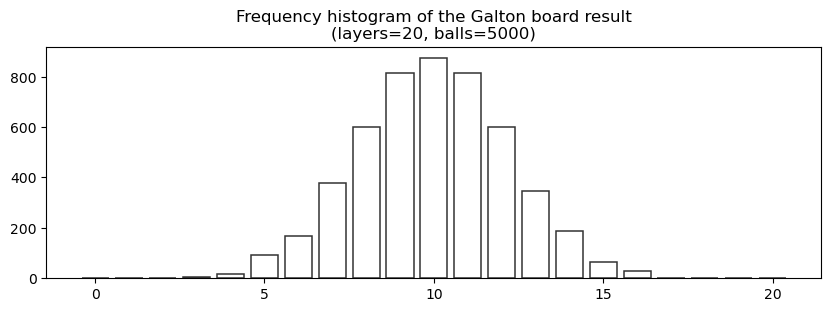

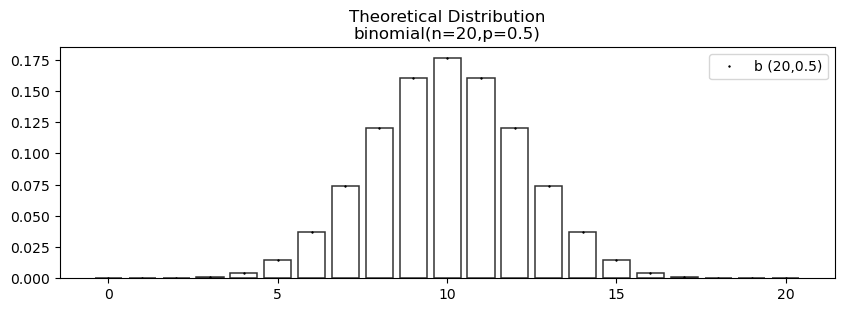

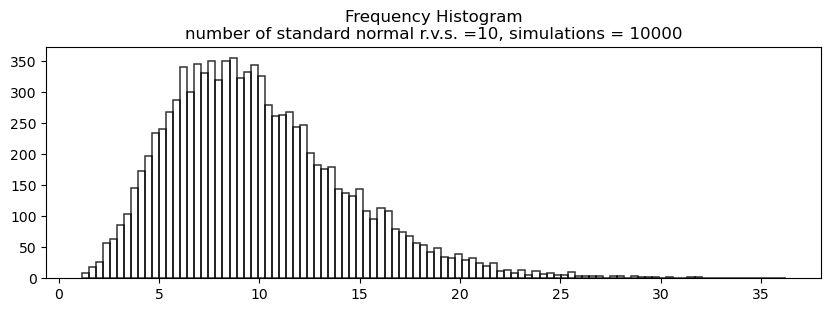

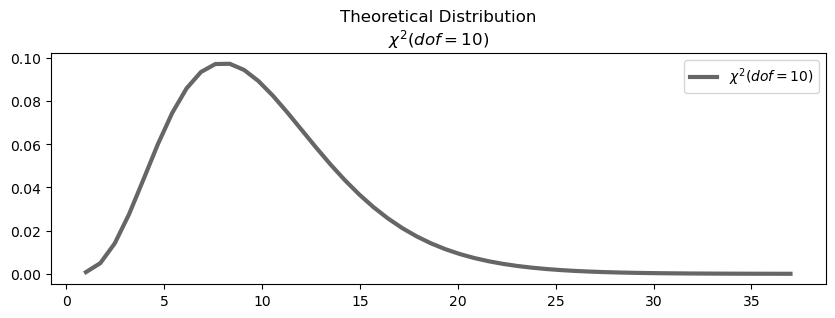

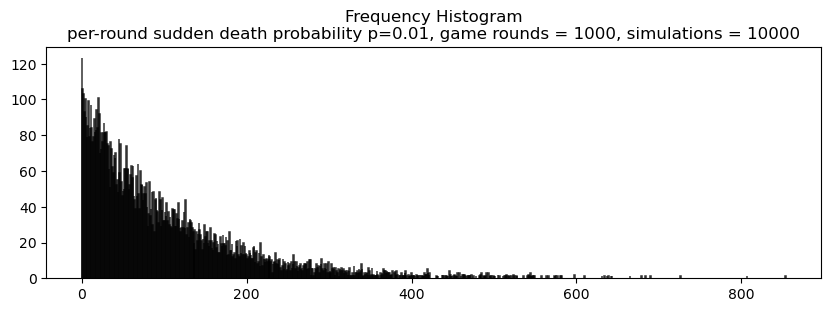

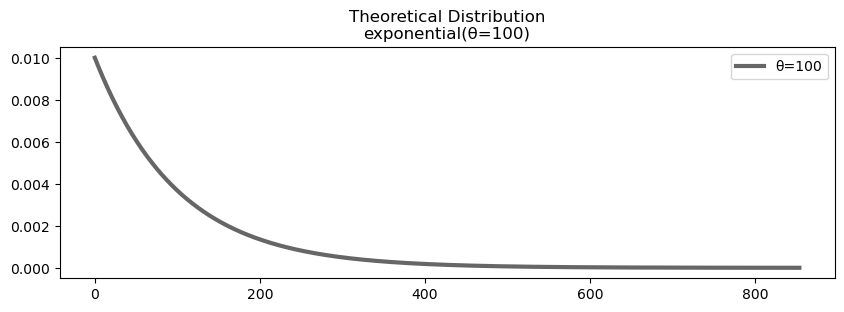

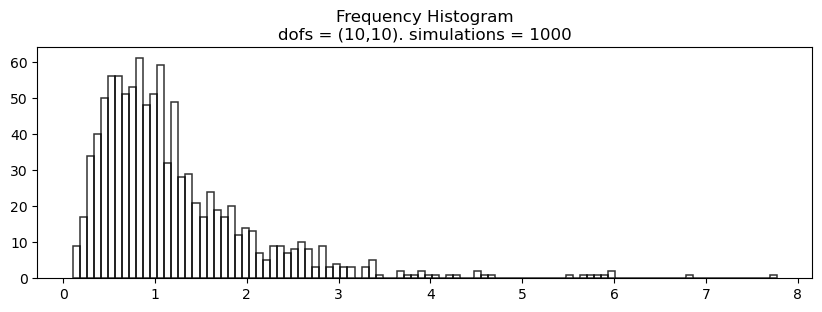

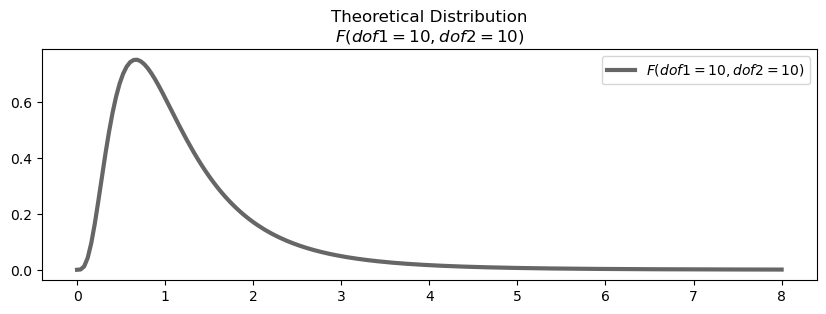

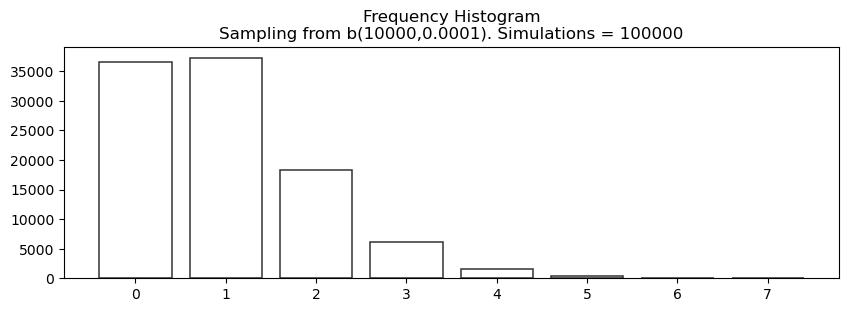

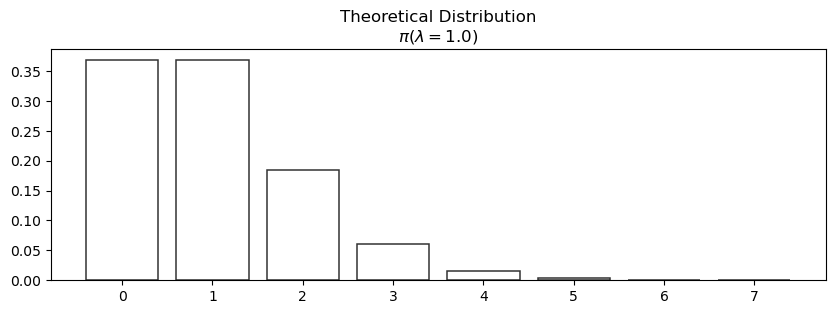

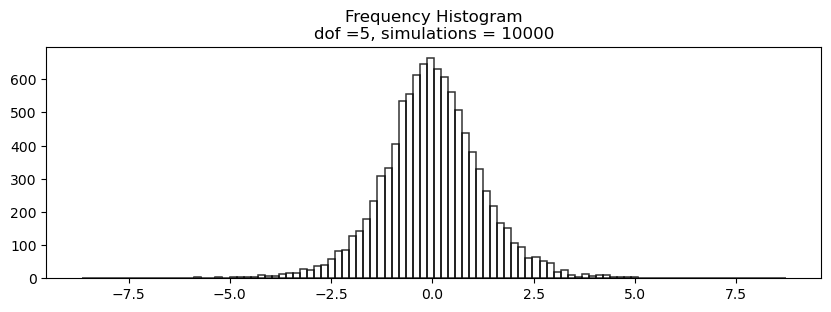

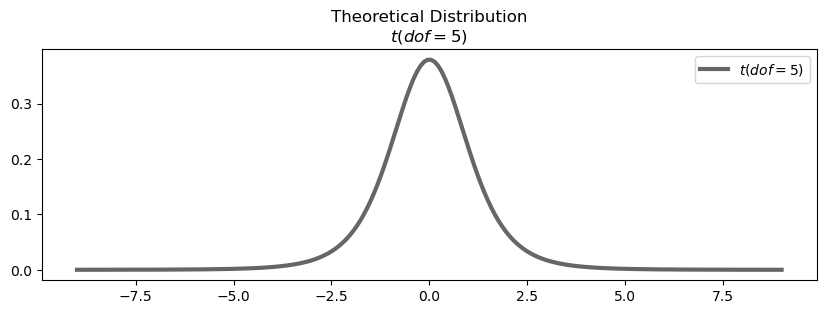

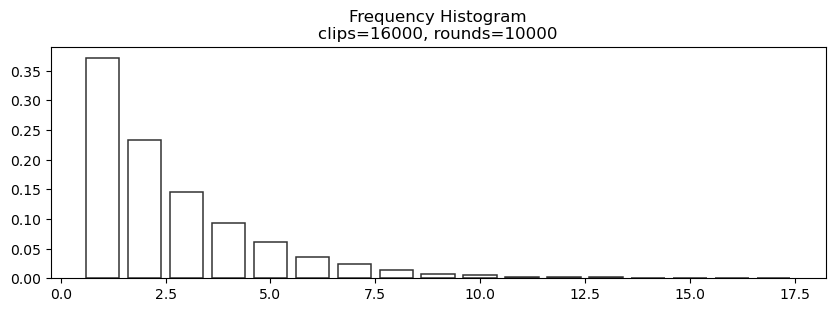

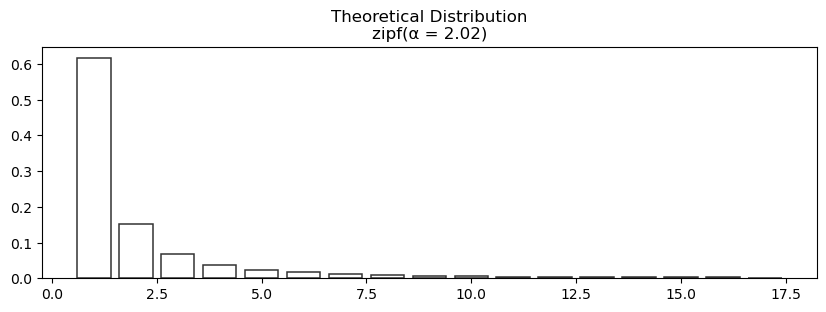

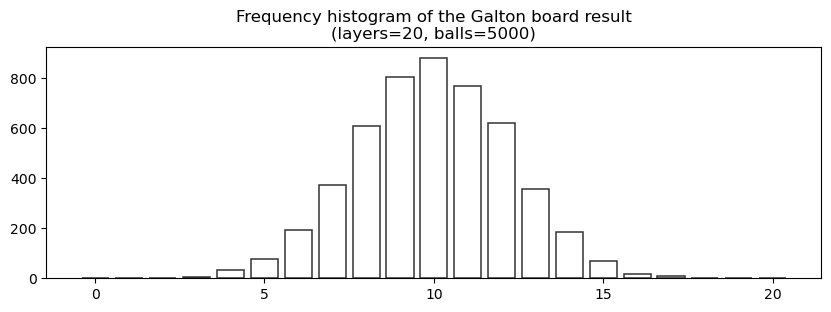

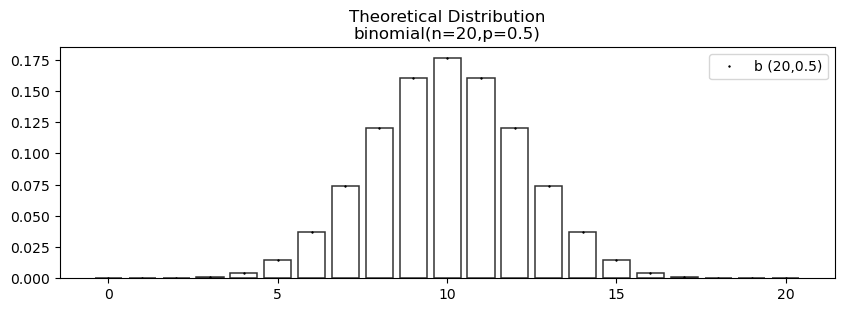

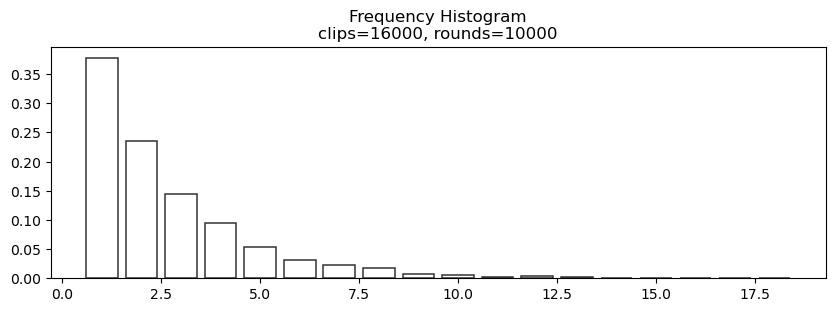

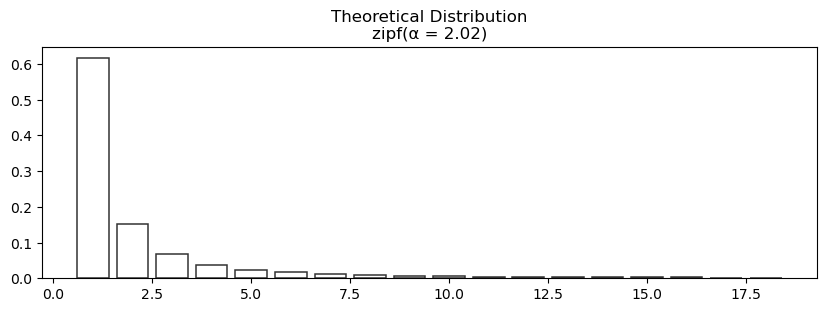

frequency = 0.24864


frequency = 7841/10000 = 0.7841
PI estimate = 3.1364


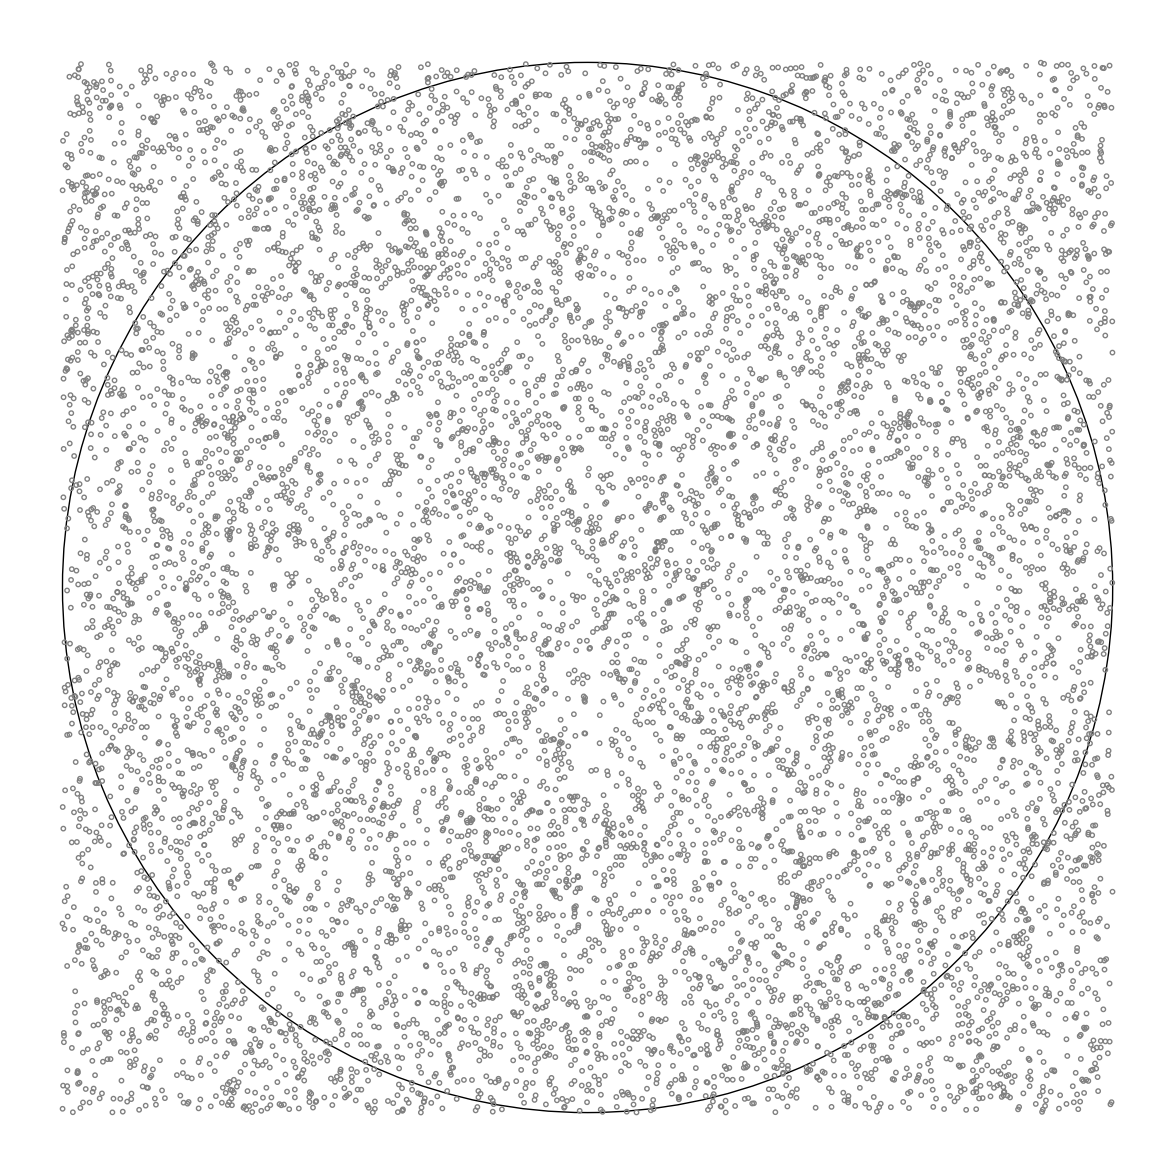

Observed survival rate = 646/2000 = 0.323


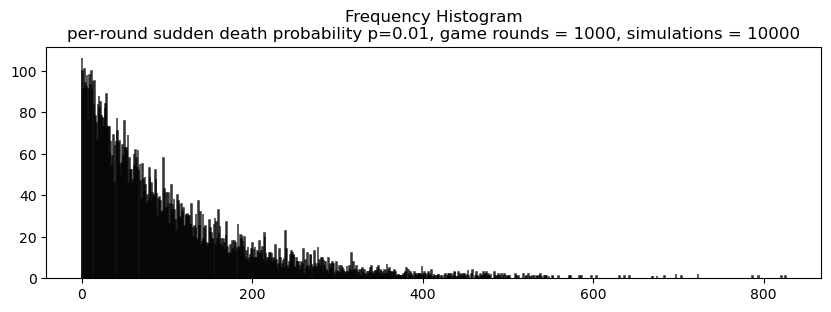

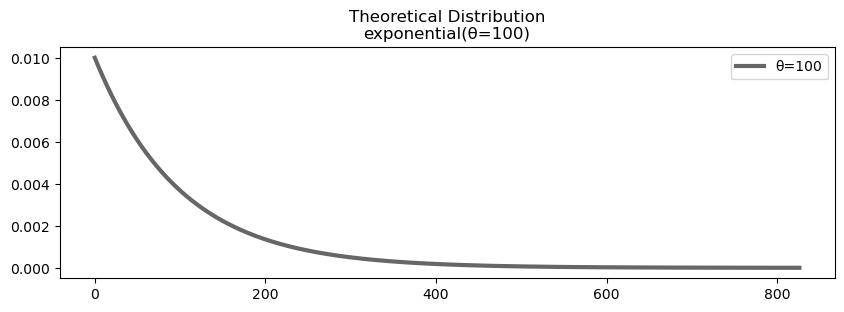

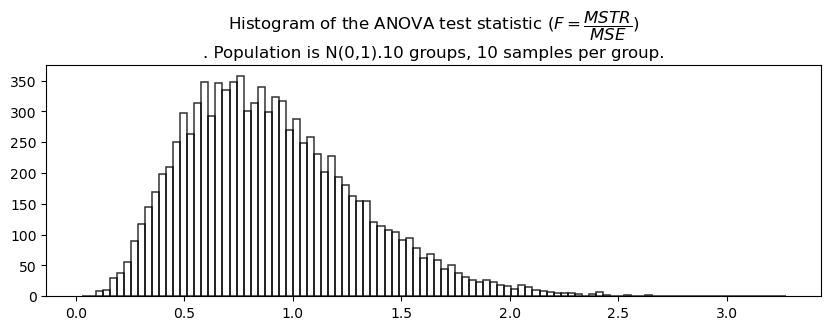

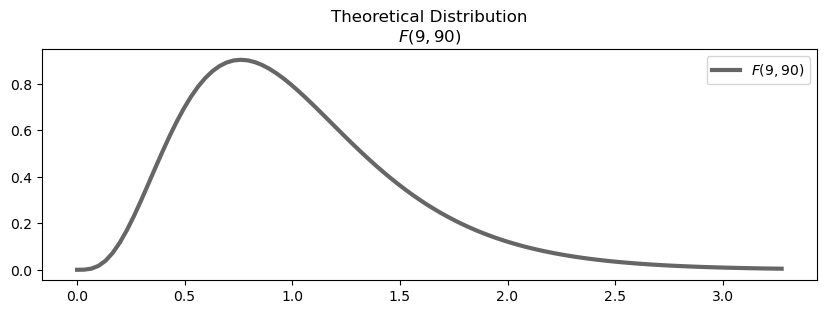

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 14816.67it/s]


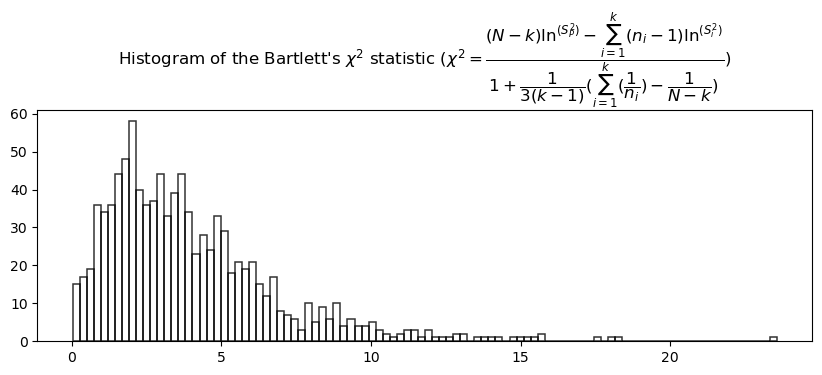

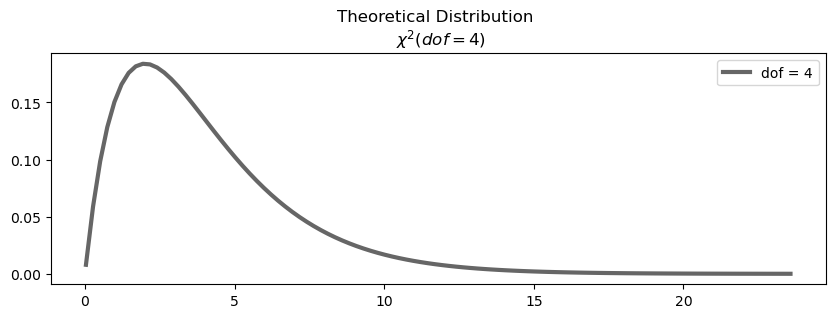

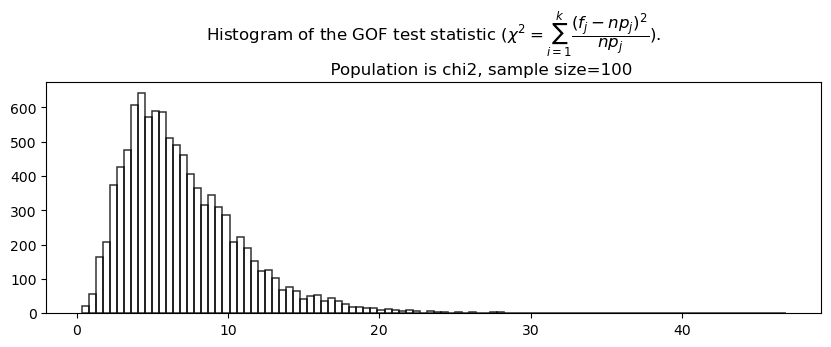

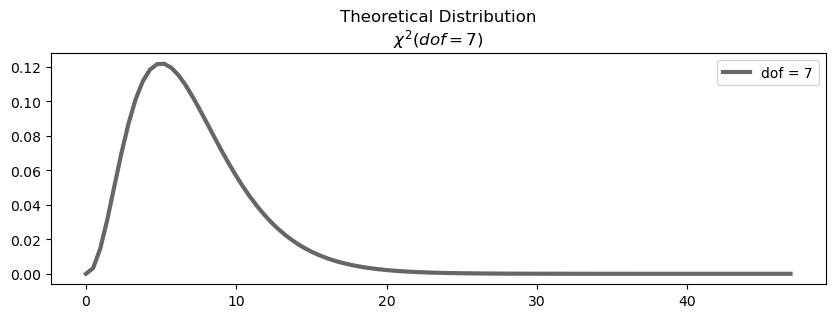

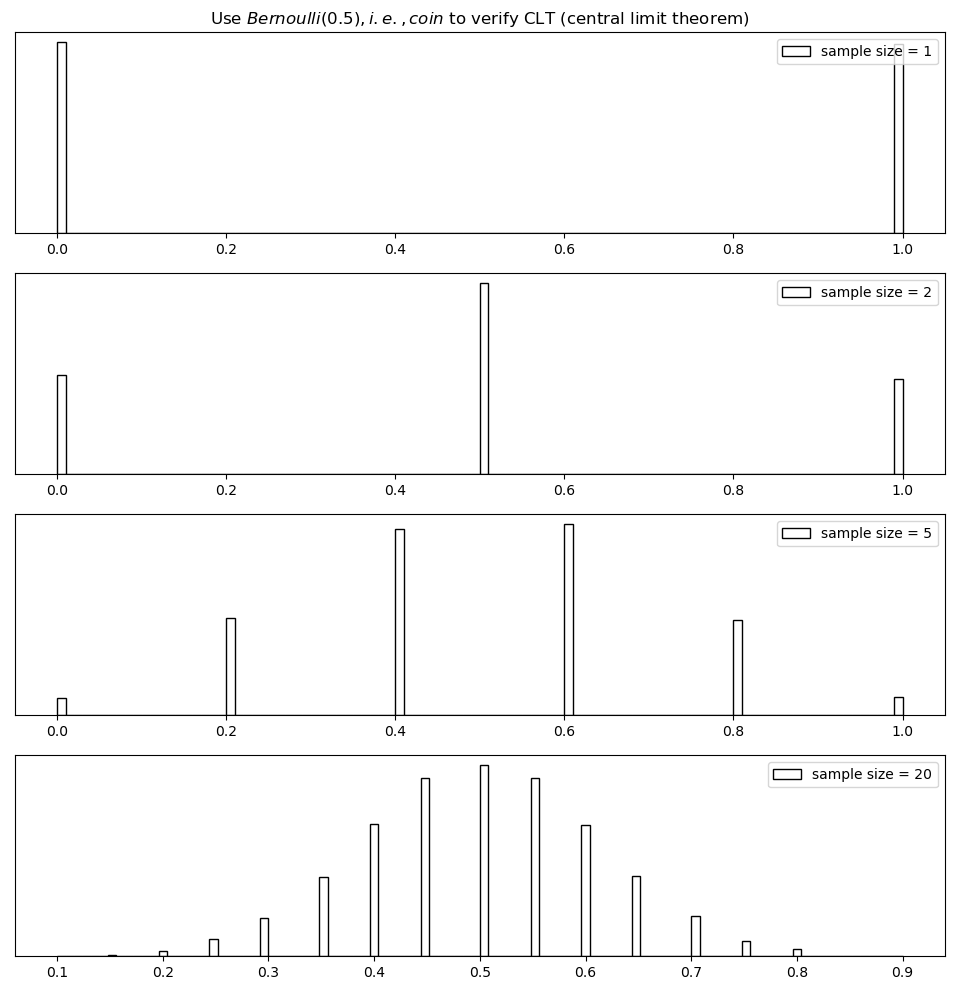

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 20565.91it/s]


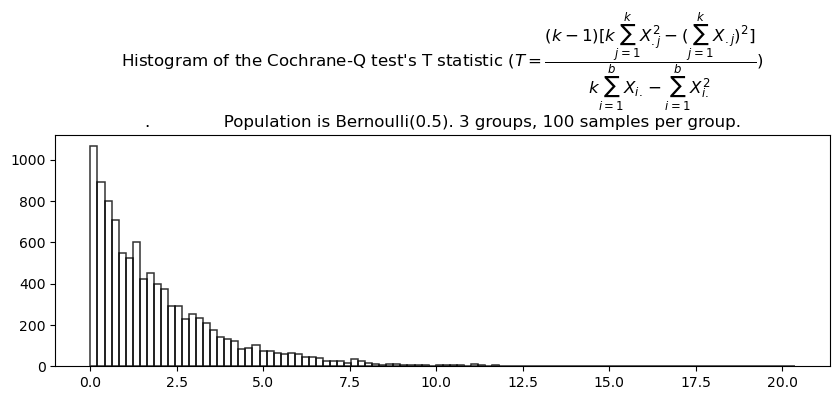

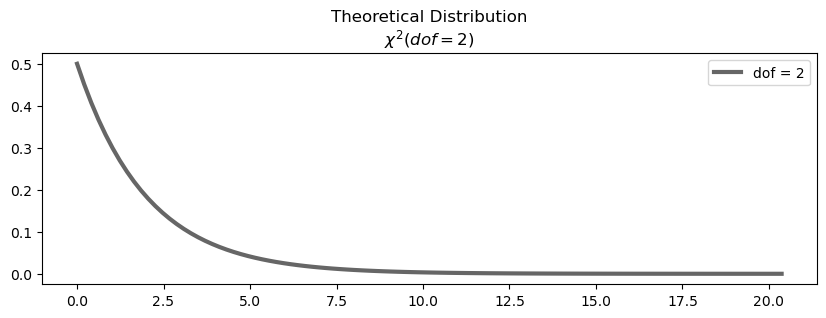

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1875.25it/s]


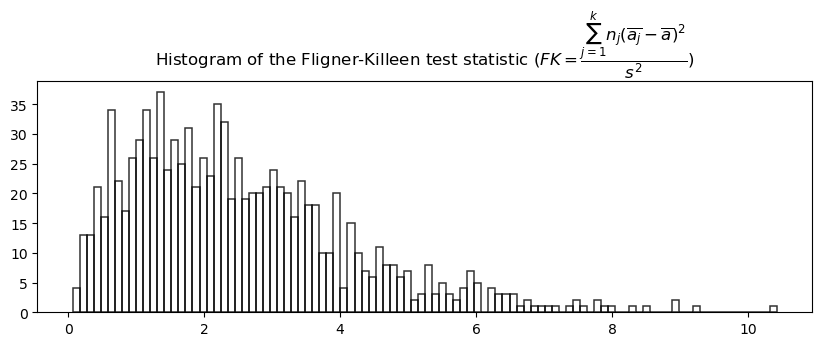

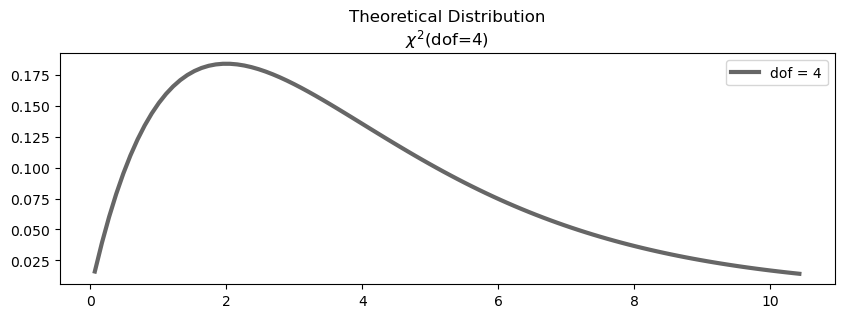

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 750.23it/s]


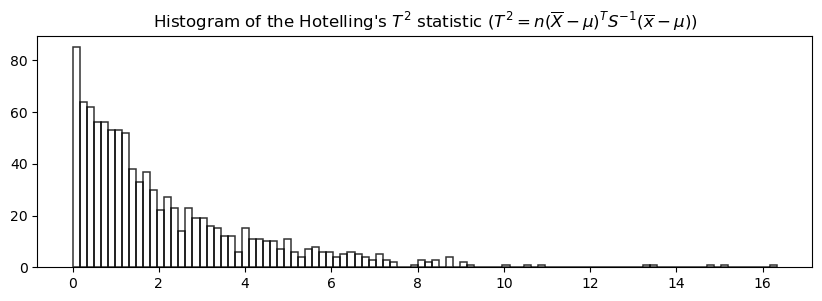

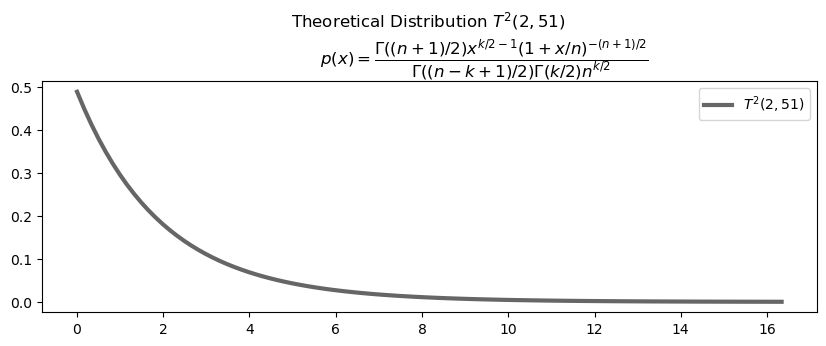

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8613.96it/s]


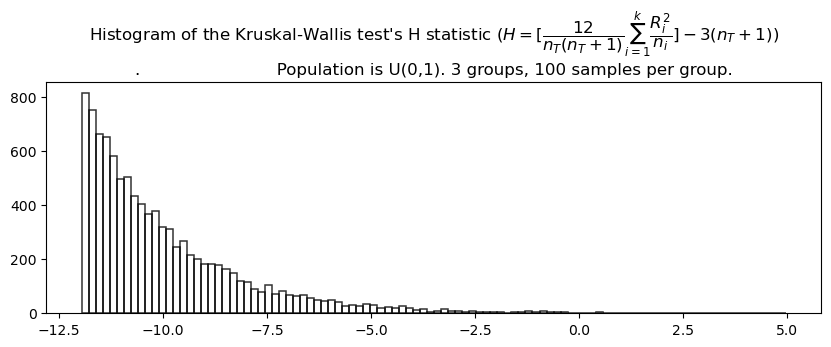

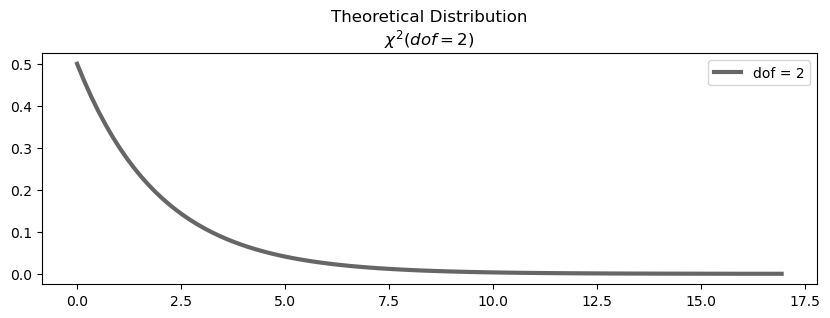

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:45<00:00, 94.66it/s]


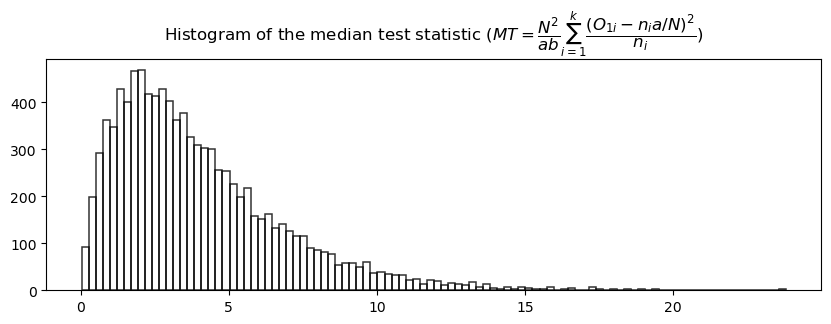

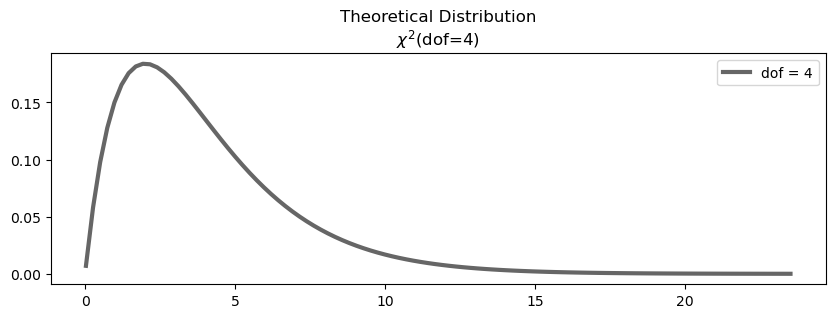

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 63959.99it/s]


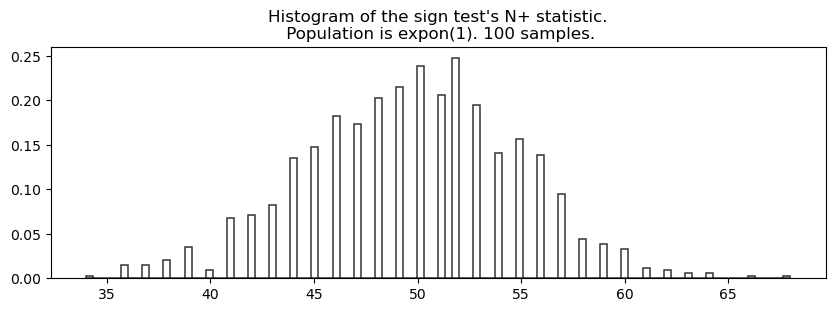

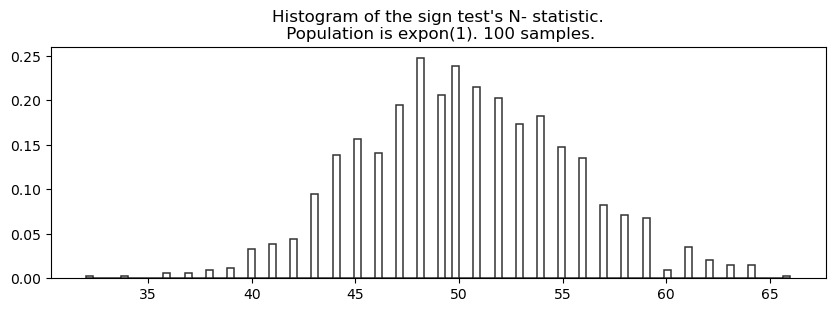

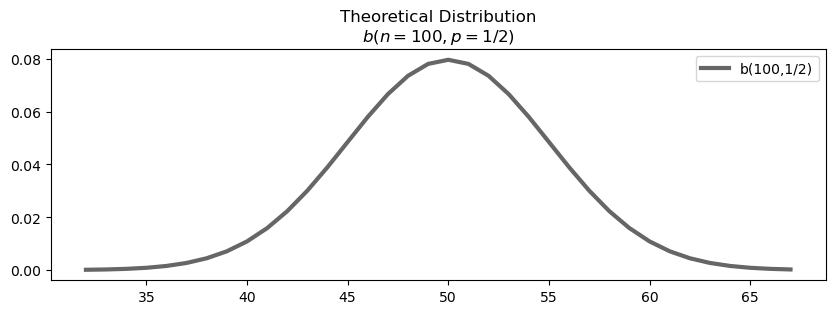

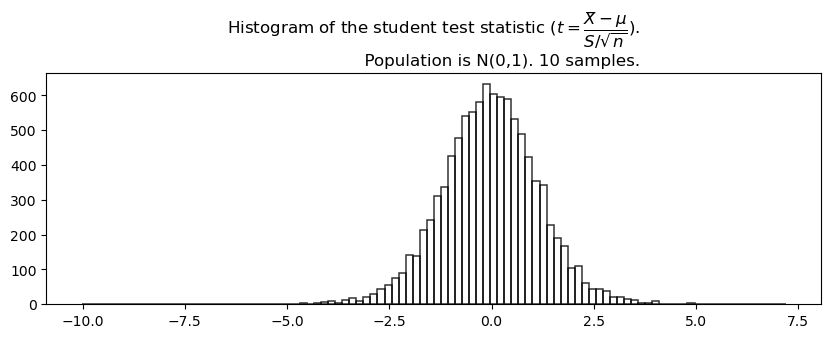

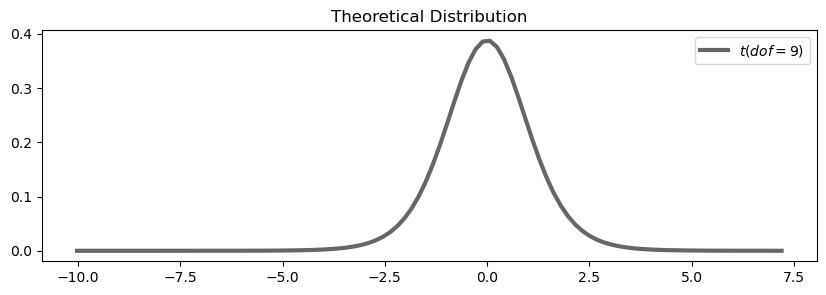

In [2]:
from mc.test import run_all
run_all()

# How to use each single class - Some examples

## Buffon's Needle Puzzle

In [3]:
from mc.experiments import Pi

mc = Pi(N=100000, a=4, l=1, flavor=0)
mc.run()

frequency = 15923/100000 = 0.15923
PI = 3.140111787979652


## The Locker Puzzle

The hundred-prisoner puzzle or the locker puzzle was first addressed by Danish scientist Peter Bro Miltersen (Gál and Miltersen 2007) (Warshauer and Curtin 2006). In this puzzle, there are 100 lockers containing No.1 to No.100. In each round, one prisoner will open 50 lockers. The game will continue if his/her number is found inside any of the opened lockers. Otherwise, the game is over, and all prisoners will be executed. The prisoners cannot communicate with each other during the game. What are the best strategy and best survival probability?
If the drawers are opened purely at random, the probability that all prisoners will be spared is only $ (1/2) ^{100} $.

The best strategy is the circular chain, i.e., the prisoner first opens the locker of his or her number, then opens the locker whose number is inside the last locker. With this strategy, the survival probability equals the probability of creating circular chains no longer than 50.

Let's calculate the success probability of this strategy. Essentially, we need to determine how many permutations out of the 100! possible permutations (ways of placing notes in the drawers) can be decomposed into cycles of length greater than 50.
* Firstly, any permutation can be decomposed into at most one cycle with a length greater than 50.
* Next, assuming the permutation $\pi$ has a cycle $\sigma$ with a length greater than 50, denoted as l.
* The cycle $\sigma$ has $\left( \begin{array}{c} 100 \\ l \end{array} \right)$ possible choices for its elements.
* After selecting l elements, we can form $(l-1)!$ different cycles.
* Therefore, the number of cycles of length l chosen from 1 to 100 has $\left( \begin{array}{c} 100 \\ l \end{array} \right)(l-1)!$.
* The remaining $100 - l$ elements can form $(100-l)!$ different permutations.
* Hence, there are  $\left( \begin{array}{c} 100 \\ l \end{array} \right)(l-1)!(100-l)! =\frac{1}{l}×100!$ such permutations in total.
* The probability of prisoners encountering such a permutation is $\frac{1}{100!}\sum^{100}_{l=51}(\frac{1}{l}×100!)=\sum^{100}_{l=51}\frac{1}{l}=0.6882$.

Therefore, the success probability of this strategy is 0.3118.

In [1]:
from mc.experiments import *
mc = Prisoners(n=100, N=2000)
mc.run()

Observed survival rate = 605/2000 = 0.3025


It is very close to the theoretical value (0.3118).  
We can further investigate how prisoner number affects the survival chance.  

Observed survival rate = 356/1000 = 0.356
Observed survival rate = 342/1000 = 0.342
Observed survival rate = 326/1000 = 0.326
Observed survival rate = 325/1000 = 0.325
Observed survival rate = 300/1000 = 0.3
Observed survival rate = 297/1000 = 0.297
Observed survival rate = 294/1000 = 0.294
Observed survival rate = 308/1000 = 0.308
Observed survival rate = 331/1000 = 0.331
Observed survival rate = 325/1000 = 0.325
Observed survival rate = 309/1000 = 0.309
Observed survival rate = 287/1000 = 0.287
Observed survival rate = 339/1000 = 0.339
Observed survival rate = 357/1000 = 0.357
Observed survival rate = 340/1000 = 0.34
Observed survival rate = 334/1000 = 0.334
Observed survival rate = 337/1000 = 0.337
Observed survival rate = 316/1000 = 0.316
Observed survival rate = 328/1000 = 0.328
Observed survival rate = 294/1000 = 0.294
Observed survival rate = 324/1000 = 0.324
Observed survival rate = 325/1000 = 0.325
Observed survival rate = 290/1000 = 0.29
Observed survival rate = 305/1000 = 0.

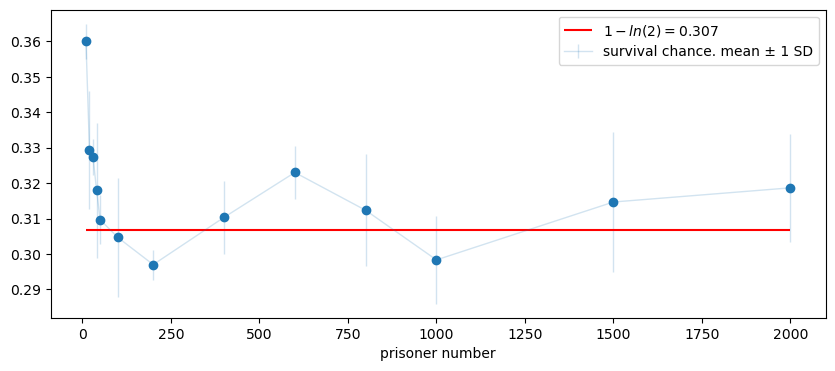

In [2]:
Prisoners.asymptotic_analysis(ns = [10, 20, 30, 40, 50, 100, 200, 400, 600, 800, 1000, 1500, 2000], repeat = 3, SD = 1) # there is still noticeable fluctuations. users may try much bigger N to get stable result, but beware the run time may explode.

# Zipf Dist - The Paper Clip Experiment

The Zipf law was proposed by George Kingsley Zipf in 1949 from his linguistic research (Kanwal, Smith, Culbertson, and Kirby 2017). The Zipf law says that a word’s frequency in natural language is inversely proportional to its rank. This means only a few words are frequently used, and most are seldom used. This phenomenon is known as the 80/20 law, the long tail distribution, or the Pareto principle.

The probability mass function for zipf is:

$f(k,a) = \frac{1}{\zeta(a)k^a}$
for $k\geq1,a >1$

zipf takes a > 1 as shape parameter.$\zeta$ is the Riemann zeta function(scipy.special.zata)

$\zeta(x) = \sum_{n=1}^{\infty}(\frac{1}{n^x}) = \sum_{n=1}^{\infty}n^{-x}$

$\zeta(x) = \frac{1}{1^x}+\frac{1}{2^x}+\frac{1}{3^x}+\frac{1}{4^x}+...$

...

$\zeta(1) = \frac{1}{1}+\frac{1}{2}+\frac{1}{3}+\frac{1}{4}+...=+\infty$


$\zeta(2) = \frac{1}{1^2}+\frac{1}{2^2}+\frac{1}{3^2}+\frac{1}{4^2}+...=\frac{\pi^2}{6}$


$\zeta(-1) = 1+2+3+4+...=-\frac{1}{12}$


$\zeta(-2) = 1^2+2^2+3^2+4^2+...=0$

$\zeta(s) = \frac{1}{\Gamma(s)}\int_{0}^{\infty}\frac{x^{s-1}}{e^x-1}dx$

Analytic continuation to the complex domain for the last term.

$\zeta(s) = \frac{1}{(1-\frac{1}{2^s})(1-\frac{1}{3^s})(1-\frac{1}{5^s})(1-\frac{1}{7^s})...}$

$\zeta(s) = \prod\frac{1}{1-\frac{1}{p^s}}$,p is prime number.


The MC experiment related to the Zipf distribution is the paper clip experiment. Each time, we drew two clips from a pipe of paper clips. The picked clips are connected and then put back. After enough rounds, the clip chains of different lengths will obey the Zipf distribution. Users may call the paper_clips() function to simulate this experiment

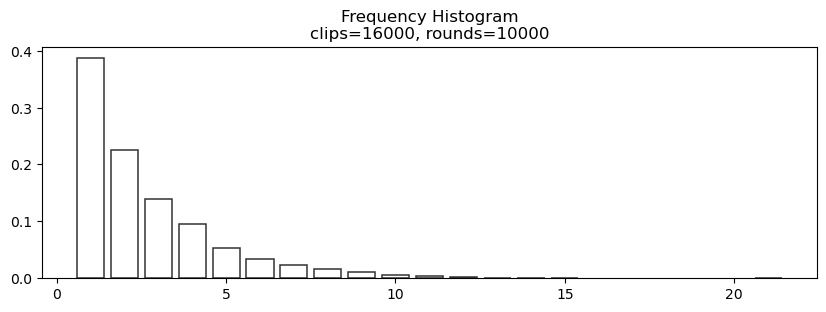

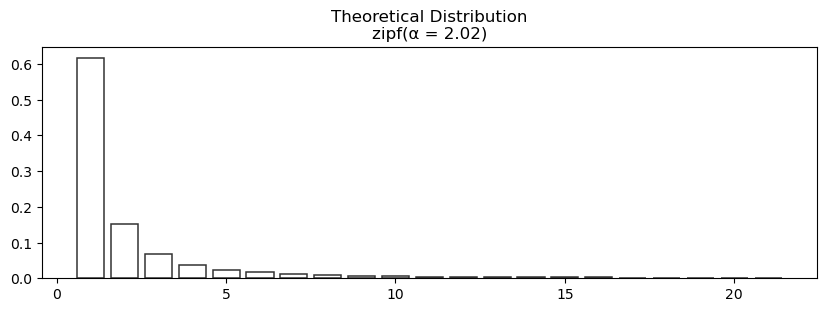

In [2]:
paper_clips =Paper_Clips(N=10000, n=16000)
paper_clips.run(verbose=False, display=True)

<br/><hr/></br>
## Benford's Law

This example shows the fibonacci series follows the Benford's law.

The fibonacci series represents how a population (e.g., rabbits) grows in a resource-unlimited environment.   
In intuitive explanation of why it follows Benford: at a steady breeding speed, it takes much longer time from 1000 to 2000 (need to increase by 1000) than from 900 to 1000 (only need to increase by 100). Therefore, it stays longer at leading digit 1 than other digits.

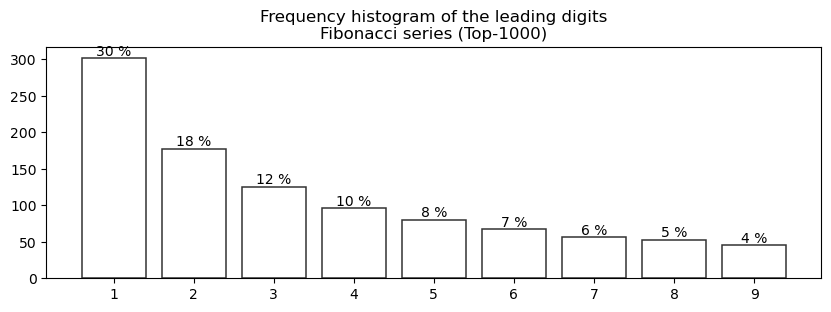

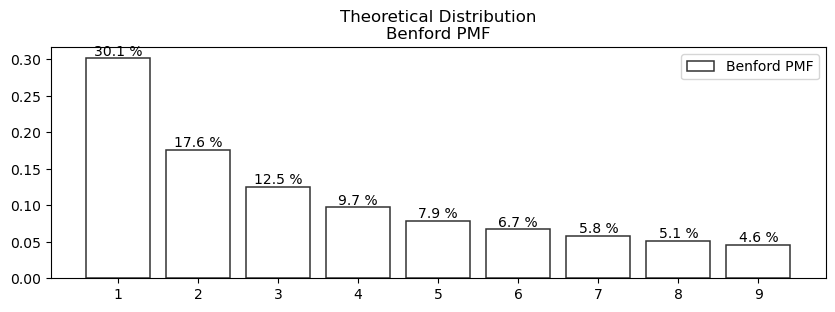

In [4]:
from mc.distributions import *
benford = Benford(N=1000, data="fibonacci")
benford.run(display=True)

## CLT (Central Limit Theorem)

The central limit theorem states the summation/averaging statistic approximates normal no matter what the underlying dist is. 
This example will use various underlying dists (e.g., 'uniform', 'expon', 'poisson', 'coin', 'tampered_coin', 'dice', 'tampered_dice') to verify CLT.

In [1]:
from mc.samplings import *

----------- uniform -----------


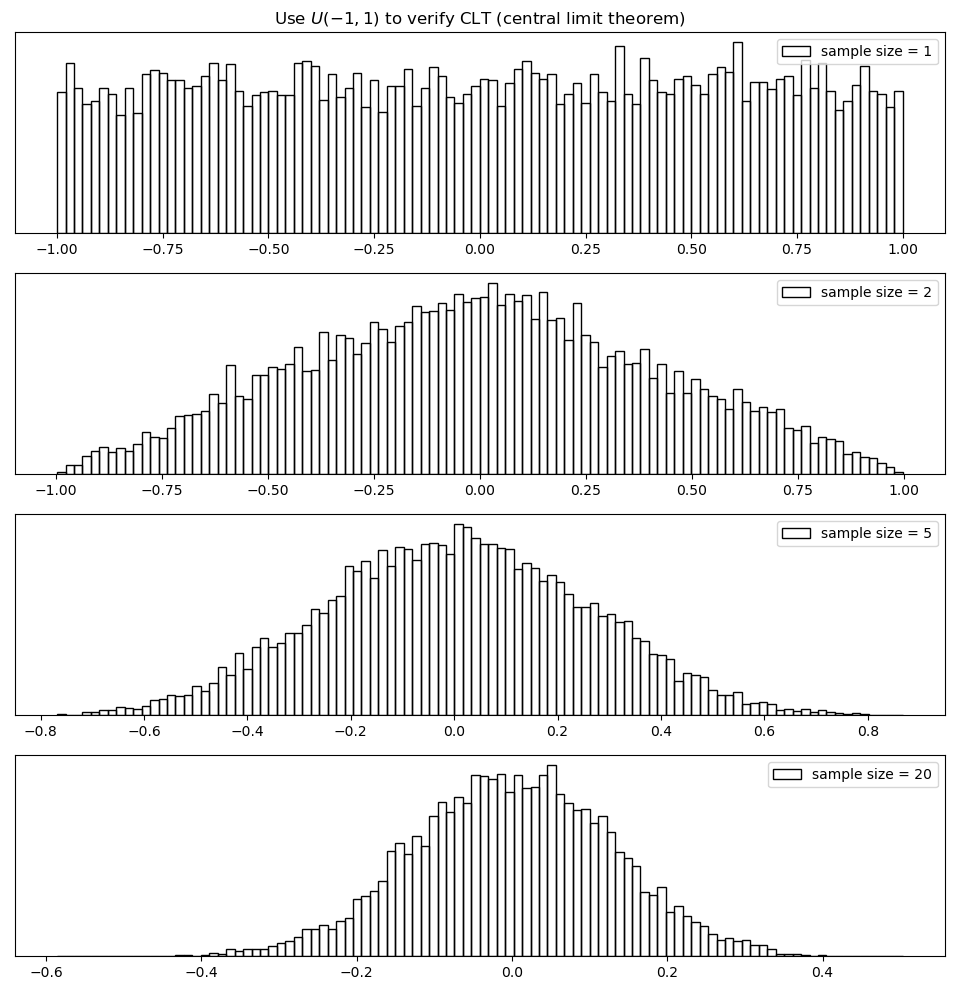

----------- expon -----------


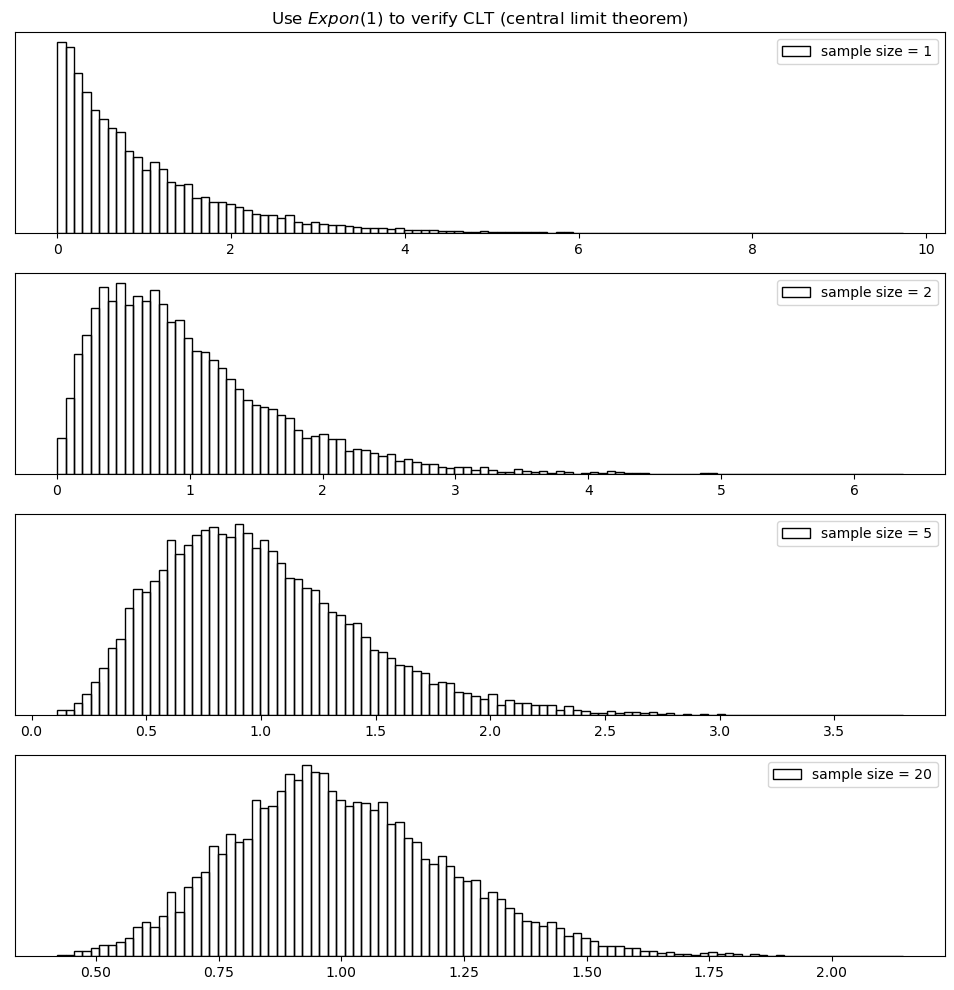

----------- poisson -----------


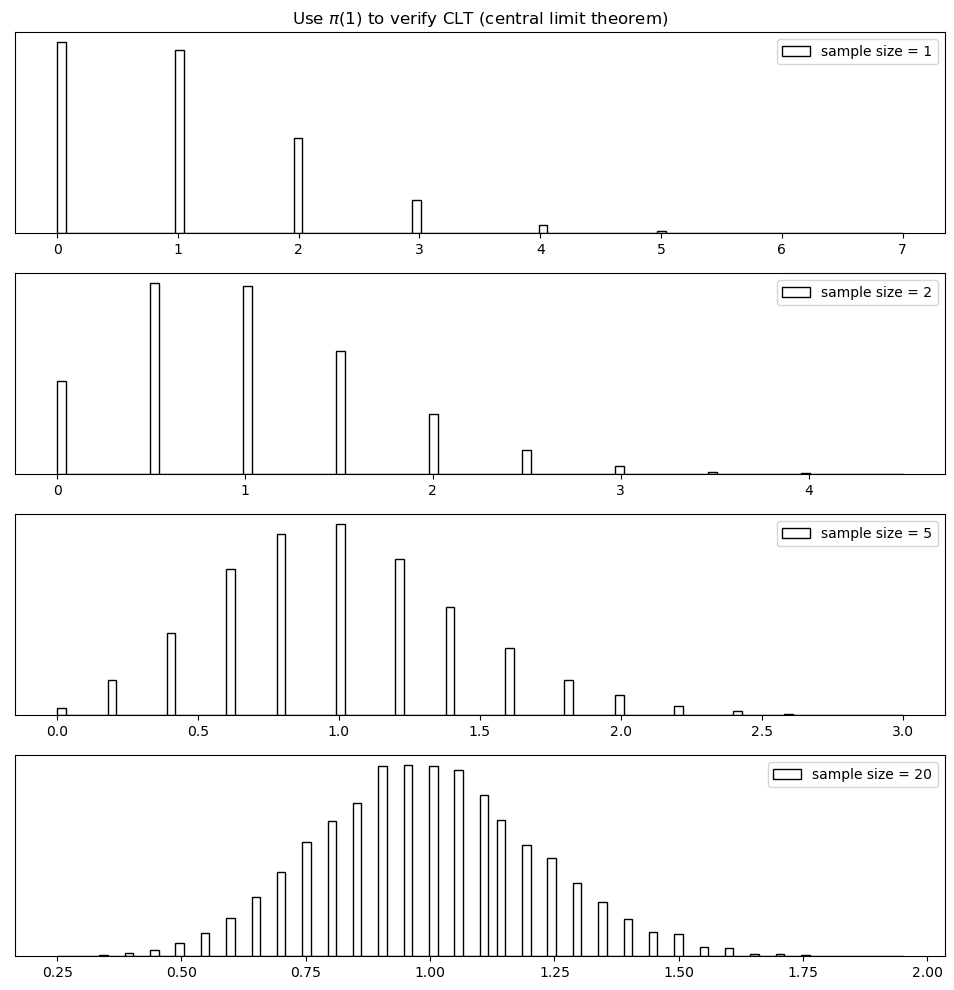

----------- coin -----------


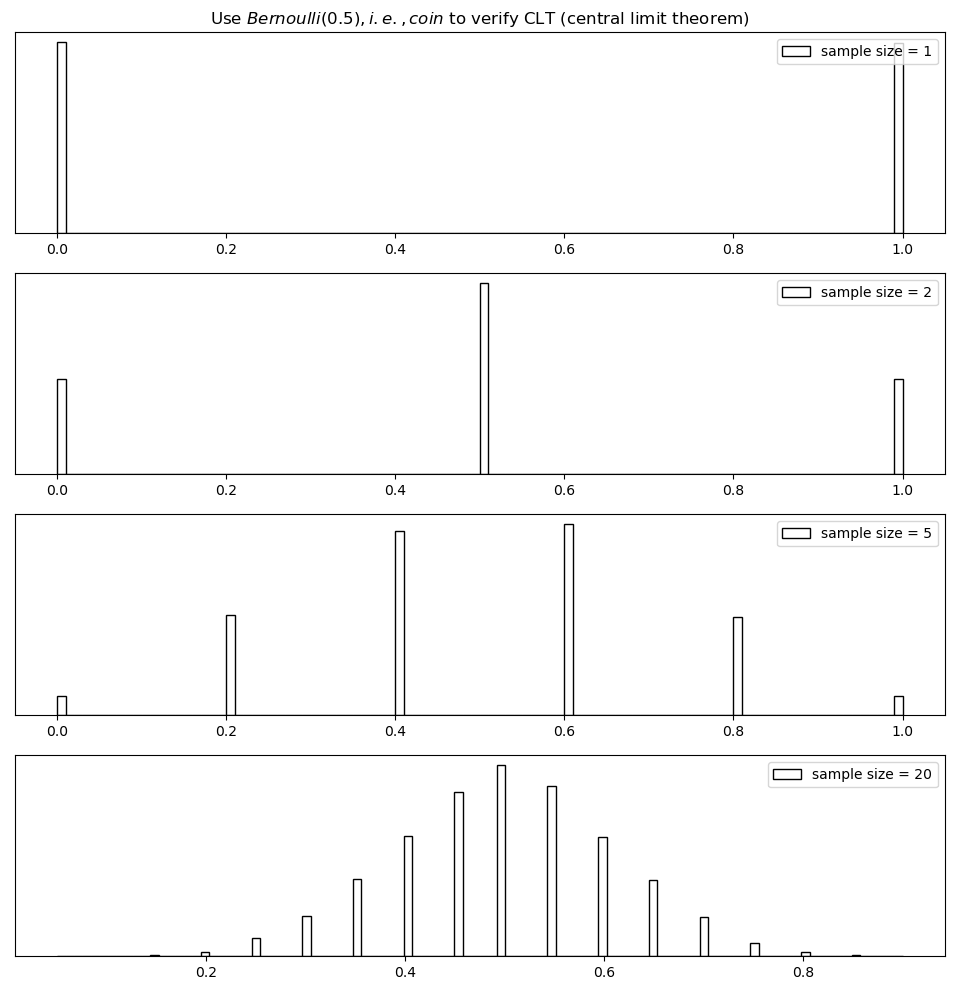

----------- tampered_coin -----------


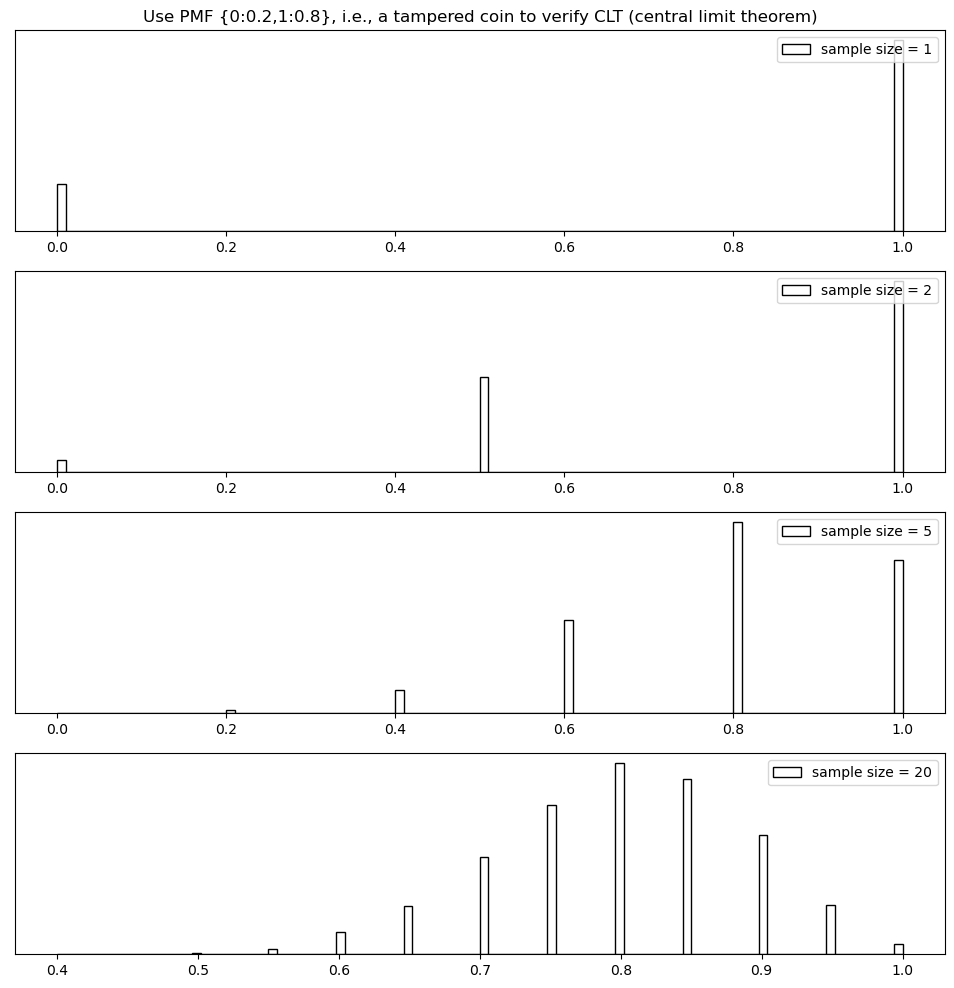

----------- dice -----------


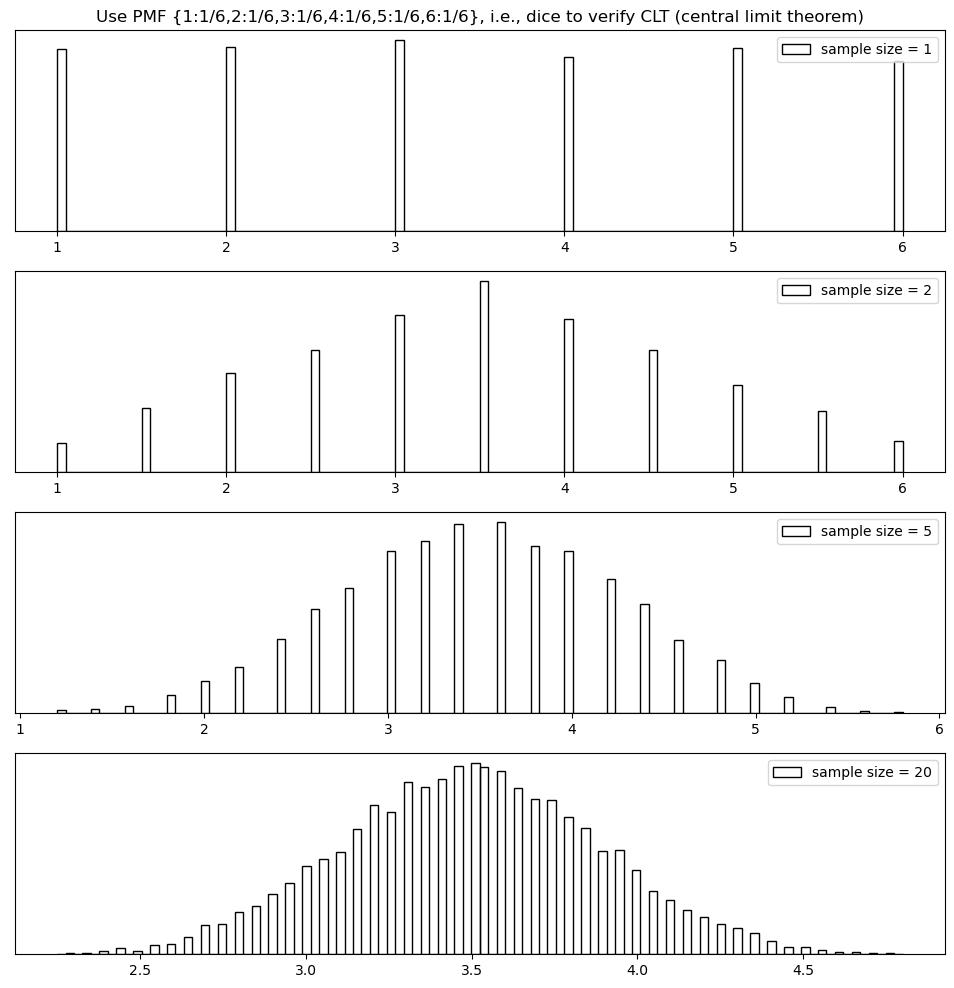

----------- tampered_dice -----------


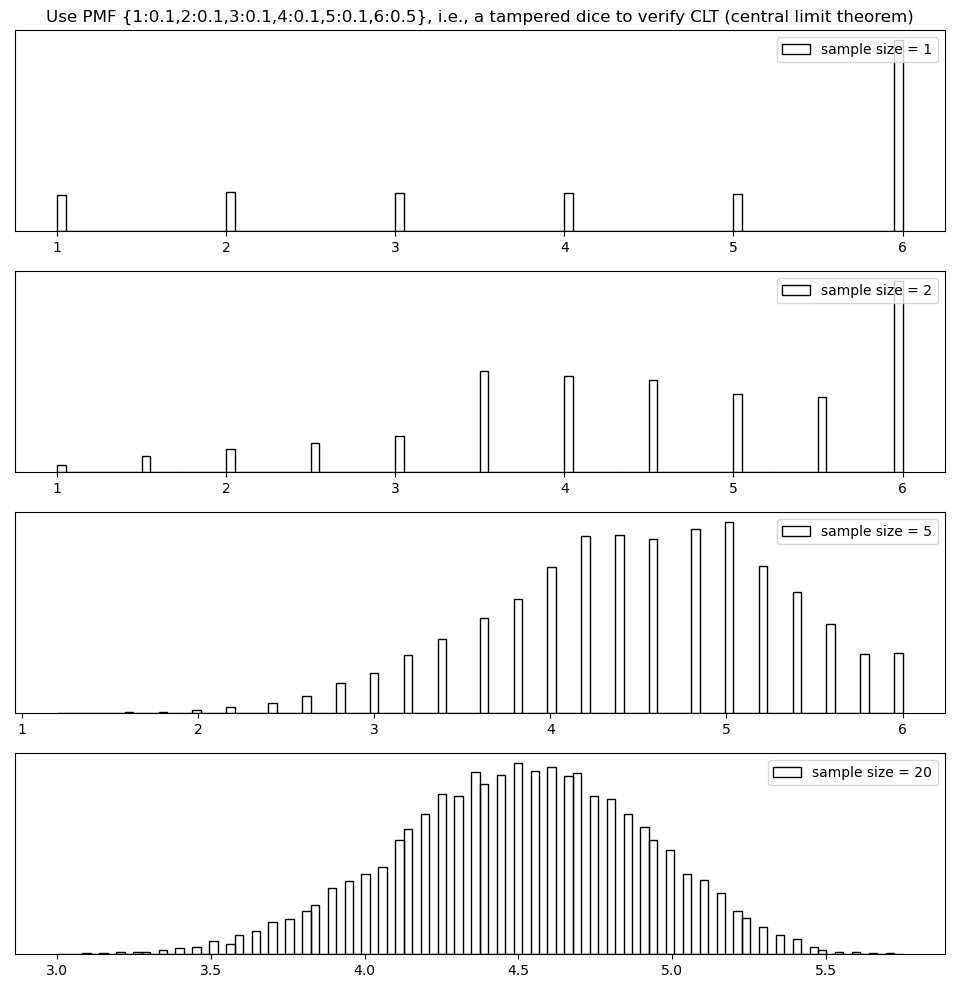

In [6]:
for underlying_dist in ['uniform', 'expon', 'poisson', 'coin', 'tampered_coin', 'dice', 'tampered_dice']:
    print('-----------', underlying_dist, '-----------')
    clt = Clt(underlying_dist=underlying_dist, n=[1, 2, 5, 20], N=10000)
    clt.run()

## Pearson's Chi-Square Goodness-of-Fit Test

This example will verify the test statitisc in Pearson’s GOF test follows the chi-square sampling dist.   

The Pearson's chi-square goodness-of-fit test has a fundamental assumption of a chi-square distribution, which is

$\chi^2 = \sum_{j=1}{k}\frac{(f_{j}-np_{j})^2}{np_i} \sim \chi^2(k-1)$

When n is sufficiently large($n \geq 50$)，$\chi^2$approaches a$\chi^2(k-1)$distribution.

Because Pearson’s chi- square GOF test is non-parametric, there is no restriction on the population distribution. chisq_gof_stat() provides two MC experiment settings. (1) The first is the Galton board (use the binominal population, 3.2.1). (2) The second is the dice game (use the uniform PMF). In both cases, the statistic histogram from the MC experiment is very close to the theoretical χ2(k − 1) distribution.


### `underlying_dist = 'binom'`, i.e., use the Galton board game.

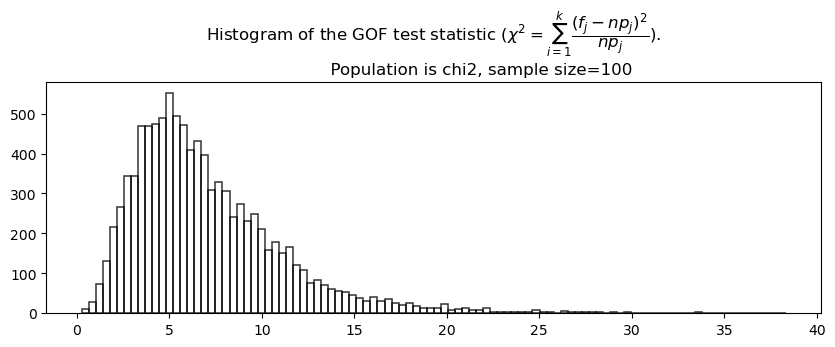

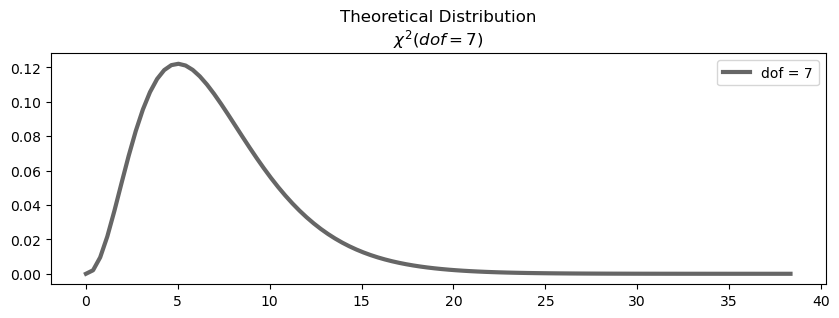

In [7]:
chisq_gof_test = Chisq_Gof_Test(underlying_dist='binom', k=8, n=100, N=10000)
chisq_gof_test.run(display=True)

### `underlying_dist = 'dice/uniform'`, use a uniform random dist

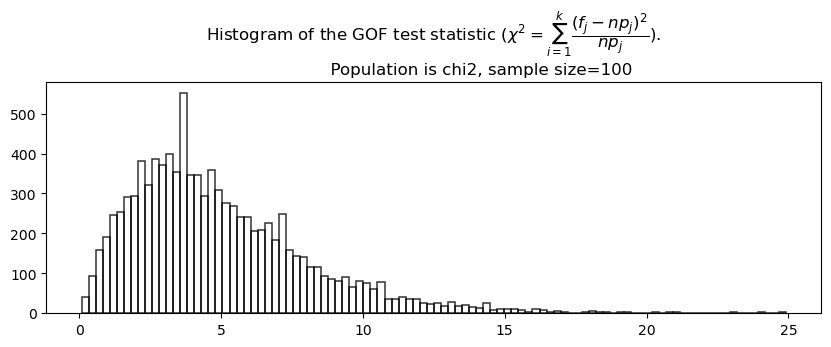

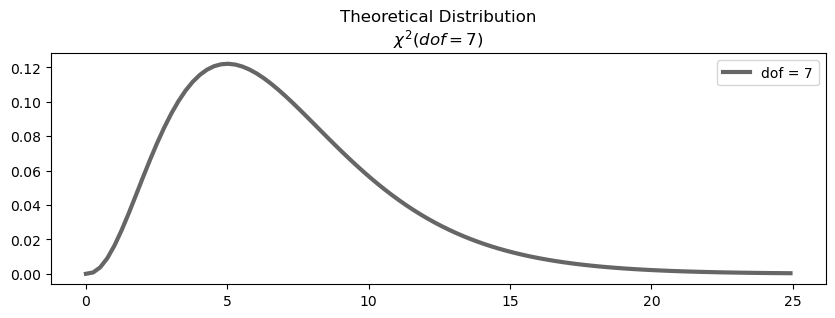

In [8]:
chisq_gof_test = Chisq_Gof_Test(underlying_dist='dice', k=8, n=100, N=10000)
chisq_gof_test.run(display=True)

## Chi-square Dist

We can also directly construct a chisq r.v. as follows.

Suppose $X_1,X_2,...,X_n$ are i.i.d.r.v.s following $N(\mu,\sigma^2)$, then $\chi^2 = \frac{1}{\sigma^2}\sum_{i=1}^{n}(X_{i}-\mu)^2\sim\chi^2(n)$.

    The squared sum of [k] r.v.s. from standard normal distributions is a chisq statistic.
    This function will verify it via [N] MC experiments.
    The sum of [k]* N(0,1)^2 r.v.s. follows a chi-square distribution as a statistical measure.
The pdf of the $\chi^2$ distribution with k(usually a positive whole number) degrees of freedom:
$f(x) = \frac{x^{\frac{k}{2}-1} e^\frac{-x}{2}}{2^\frac{k}{2} \Gamma(k/2)}$  for x $\geq$ 0.

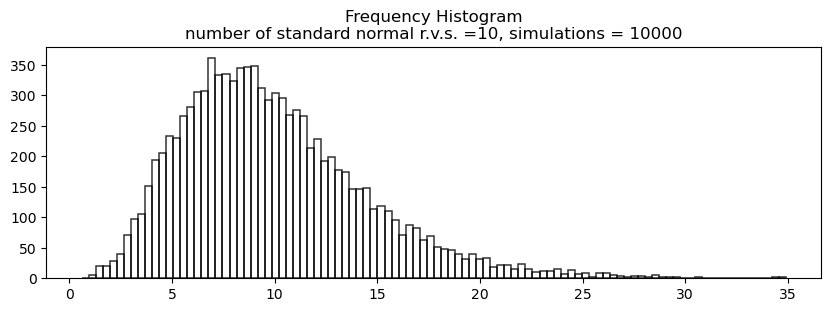

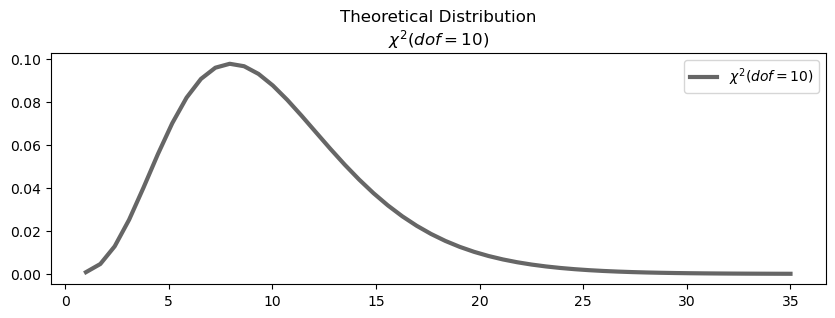

In [2]:
from mc.distributions import Chisq
chisq = Chisq(n=10, N=10000)
chisq.run()

## t test stastic

In t test, we sample n samples from a normal distribution, the statistic will follow the student's distribution.

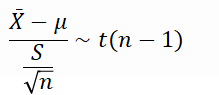

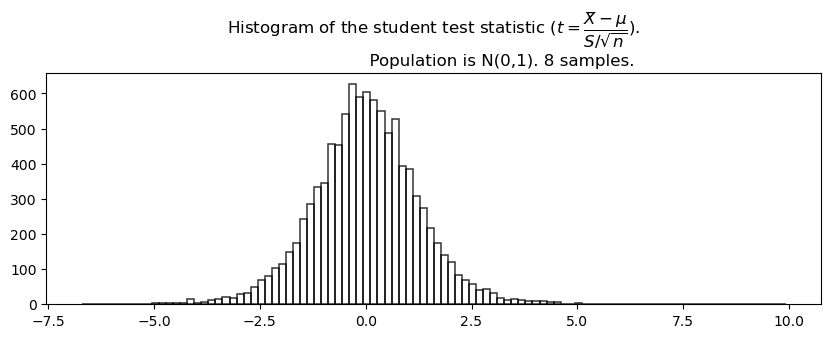

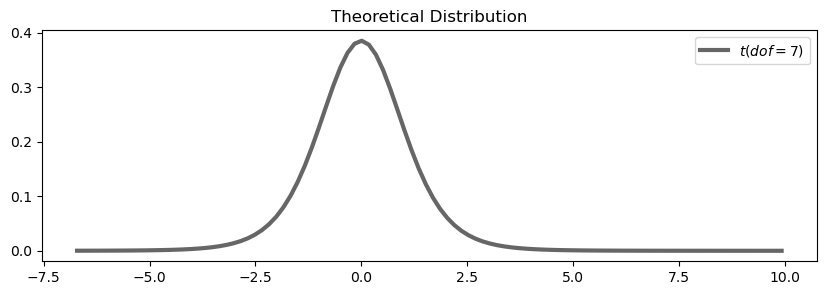

In [9]:
t_test = T_Test(n=8, N=10000)
t_test.run()

## Student Dist

Suppose $X\sim N(0,1),Y\sim\chi^2(n)$, and X and Y are independent. In this case, the variable $t = \frac{X}{\sqrt{Y/n}}$ follows a t-distribution with n degrees of freedom.

THis exmaple samples from this random variable ($t = \frac{X}{\sqrt{Y/n}}$) and compare it with the theoretical t distribution 

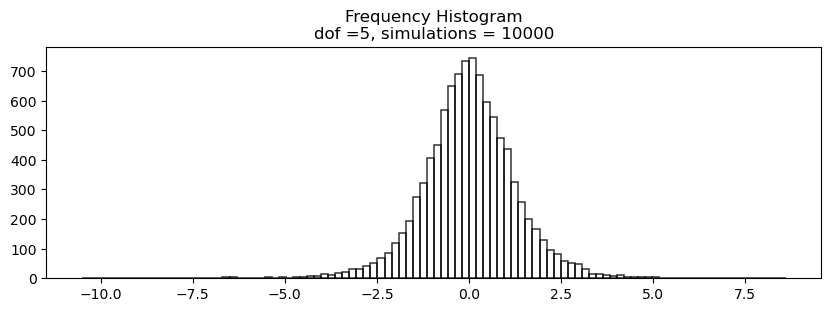

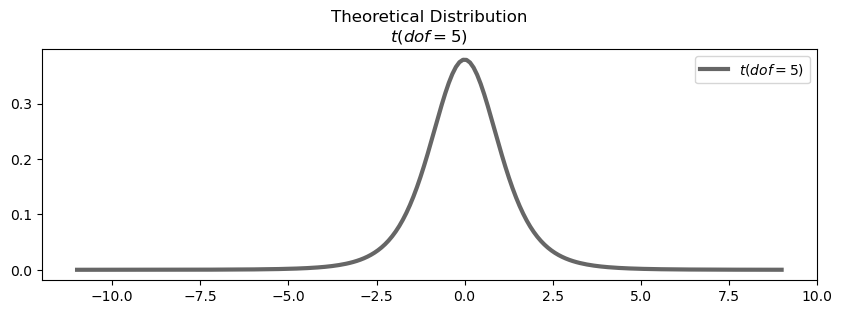

In [3]:
from mc.distributions import Student
s = Student()
s.run()

## ANOVA

The `Anova` class draws samples from multi-group normal populations and verify its statistic:  

F = MSTR/MSE ~ F(k-1, n-k)

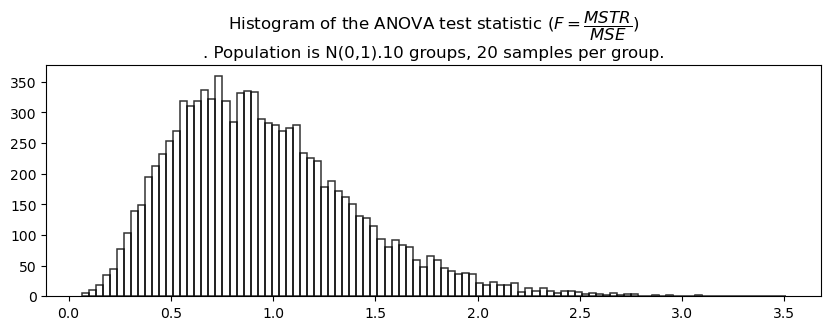

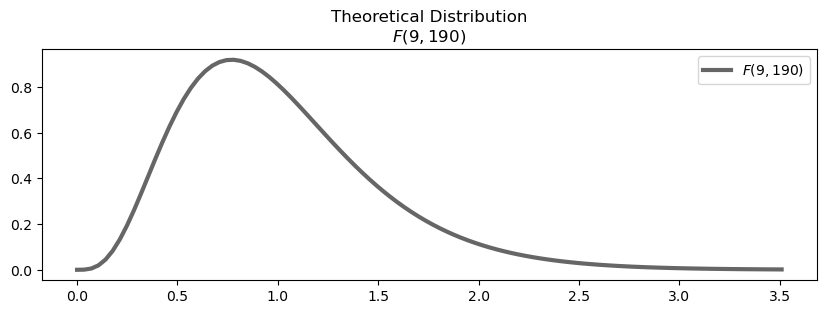

In [10]:
anova_test = Anova(k=10, n=20, N=10000)
anova_test.run()

## F Distribution

About the F Distribution

Let $U \sim \chi^2(n_1),V \sim \chi^2(n_2)$, if $U$ and $V$ are independent, then the random variable:
         
$F = \frac{U/n_1}{V/n_2}$ follows an F-distribution with degrees of freedom $n_1$ and $n_2$. Here, $n_1$ is referred to as the first degree of freedom and $n_2$ as the second degree of freedom. It is denoted as $F \sim F(n_1,n_2)$.

As a result, $\frac{1}{F} = \frac{V/n_2}{U/n_1} \sim F(n_2,n_1)$

The `distributions.F()` function draws samples from the above F random variable ($F = \frac{U/n_1}{V/n_2}$) and compares it with the theoretical distribution

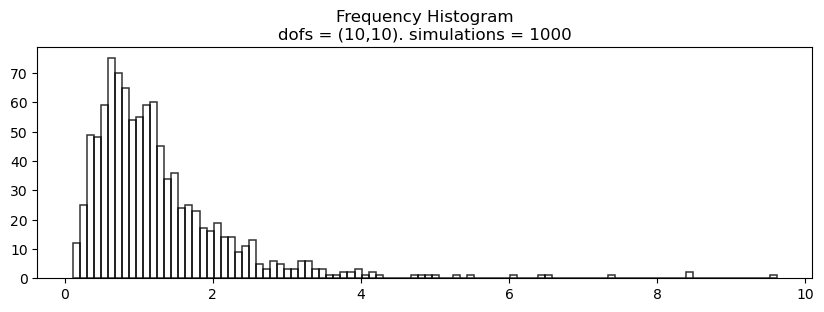

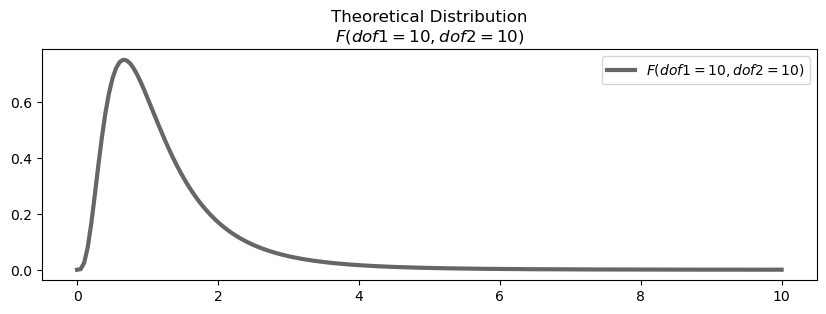

In [4]:
from mc.distributions import F
f = F()
f.run()

## Median Test

The median test is a special case of the chi-square test for independence.Given K samples with $n_{1}, n_{2}, .... n_{k}$ observations, compute the grand median of all $n_{1}+n_{2}+....+n_{k}$ observations. Then construct a $2×k$ contingency table where row one contains the number of observations above the grand median for each of the $K$ samples and row two contains the number of observations below or equal to the grand median for each of the $K$ samples. The chi-square test for independence can then be applied to this table. More specifically

$H_{o}$: All k populations have the same median

$H_{a}$: All least two of the populations have different medians

Test Statistic: $MT = \dfrac{N^2}{ab}\sum_{i=1}^{k}\dfrac{(O_{1i}-n_{i}a/N)^2}{n_{i}}$

where

$a$ = the number of observations greater than the median for all samples

$b$ = the number of observations less than or equal to the median for all samples

$N$ = the total number of observations

$O_{1i}$ = the number of observations greater than the median for sample i

Significance Level: $\alpha$

Critical Region: $T>\chi^{2}_{1-\alpha;k-1}$

Conclusion: Where $\chi^{2}$ is the percent point function of the chi-square distribution and $k-1$ is the degrees of freedom.Reject the independence hypothesis if the value of the test statistic is greater than the chi-square value.

Note that the chi-square critical value is a large sample approximation. Conover recommends dropping all samples with only one observation from the analysis in order for the approximation to be valid. 

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:22<00:00, 70.06it/s]


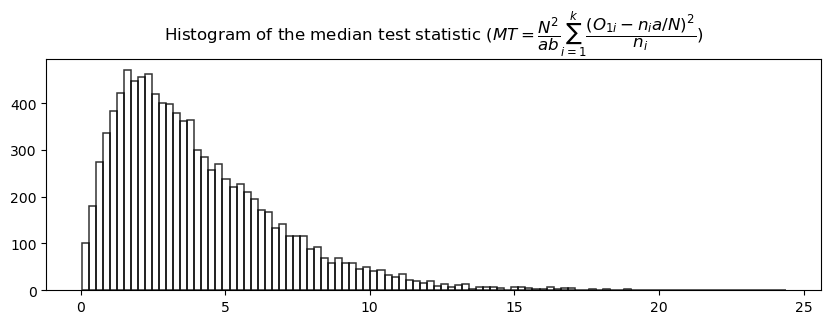

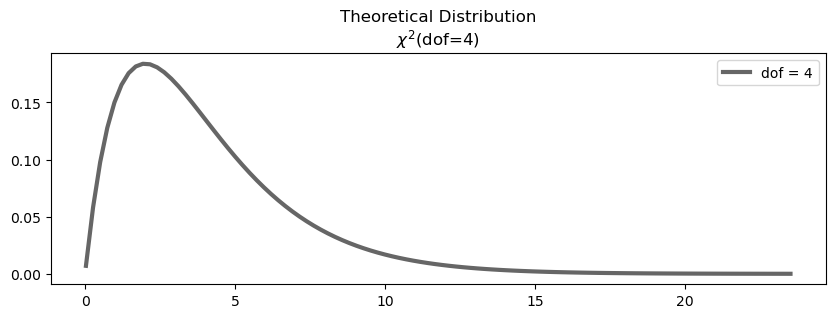

In [11]:
median_test = Median_Test(n=1000, k=5, N=10000)
median_test.run(display=True)

## Kruskal-Wallis test

The Mann-Whitney or Wilcoxon test compares two groups while the Kruskal-Wallis test compares 3.  
Kruskal-Wallis test is a non-parametric version of one-way ANOVA. It is rank based.  
Kruskal-Wallis H: a $\chi^{2}$test statistic.

$H = [{\dfrac{12}{n_{T}(n_{T}+1)}\sum_{i=1}^{k}\dfrac{R_{i}^2}{n_{i}}]-3(n_{T}+1)}$

$K$=number of populations

$n_i$=the number of observations in sample i

$n_T$=$\sum_{i=1}^{k}n_i$=the total number of observations in all samples

$R_i$=the sum of the ranks for sample
 
The MC test can be used with 3 groups from N(0,1) or U(0,1) populations or other distributions, with equal sample sizes.

The following uses U(0,1) to verify H follows $\chi^{2}$.

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 6571.45it/s]


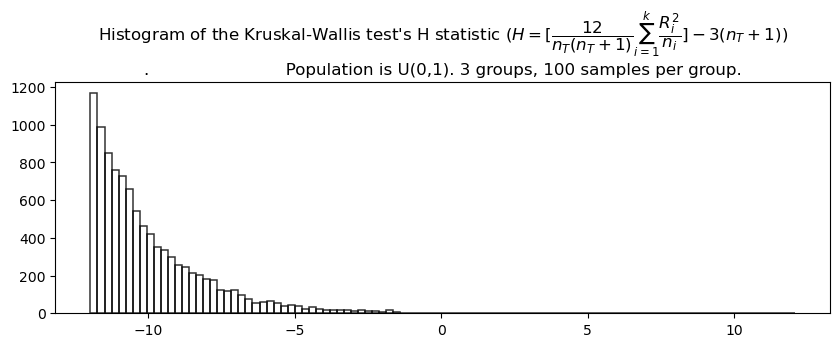

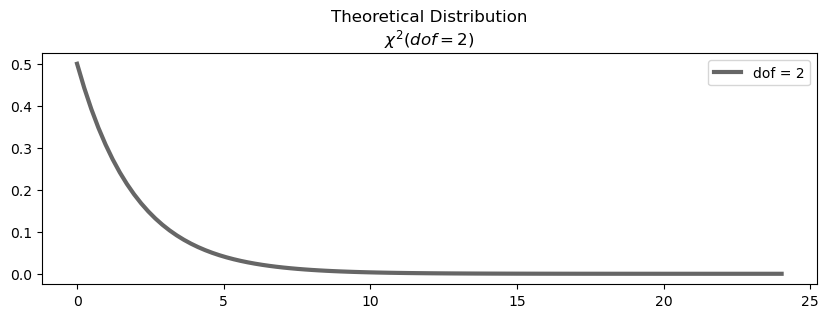

In [12]:
kw_test = Kw_Test(underlying_dist='uniform', k=3, n=100, N=10000)
kw_test.run(display=True)    #偏移

## Sign Test

We will verify its N+ and N- statistics follows the binom sampling dist.

1. Calculate $X_i - m_0$  for i = 1,2,...,n.
2. Define $N-$ = the number of negative signs obtained upon calculating $X_i - m_0$  for i = 1,2,...n.
2. Define $N+$ = the number of positive signs obtained upon calculating $X_i - m_0$  for i = 1,2,...n.

Then, if the null hypothesis is true, that is, $m=m_0$,then $N-$ and $N+$ both follow a binomial distribution with parameters $n$ and $p = 1/2$. That is: 

$N- \sim b(n,\frac{1}{2})$ and $N+ \sim b(n,\frac{1}{2})$

Use Expon dist to verify:

$0.5 = \int_{m}^{+\infty}f(x)dx$,  
$f(x) = 1/ \theta * exp(-x/ \theta) $ , when x > 0

The theoretical median is m = $ \theta ln(2) $

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 21429.03it/s]


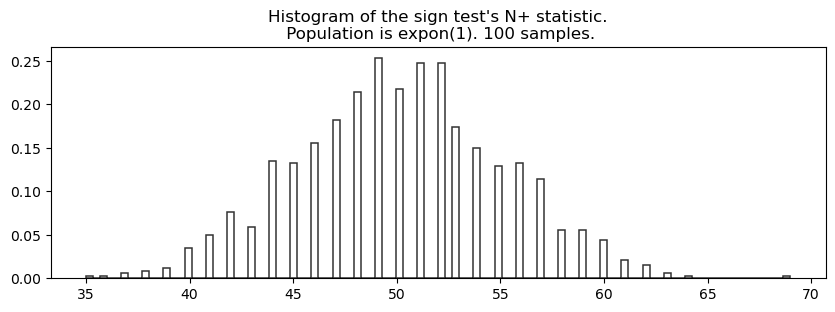

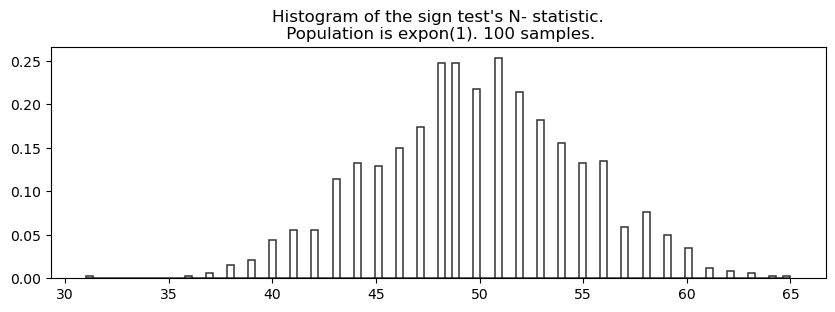

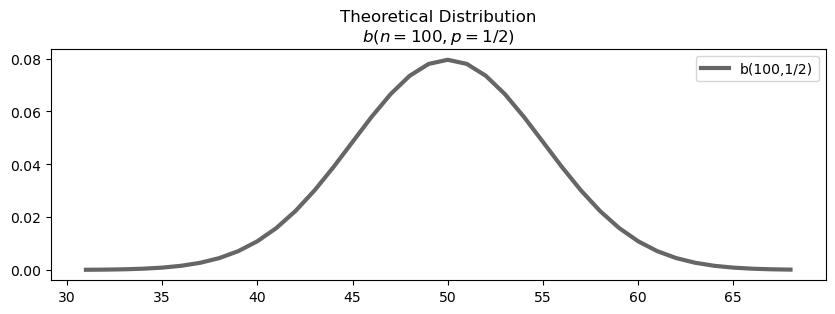

In [13]:
sign_test = Sign_Test(underlying_dist='expon', n=100, N=1000)
sign_test.run(display=True)

## Cochrane-Q 

Cochran Q Test - A extension to McNemar Test

Null Hypothesis($H_0$): The proportion of "successes" is the same in all group.

$T = \dfrac{(k-1)[k\sum_{j=1}^{k}X_{.j}^2-(\sum_{j=1}^{k} X_{.j})^2]}{k\sum_{i=1}^{b}X_{i.}-\sum_{i=1}^{b} X_{i.}^2}$

where:

$k$: The number of treaments (or "groups")

$x_{.j}$:The column total for the $j^{th}$ treatment

$b$: The number of blocks

$x_{i.}$:The row total for the $i^{th}$ block

$N$:The grand totral

The test statistic $T$ follows a Chi-Square distribution with k-1 degreee of freedom.

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 14177.89it/s]


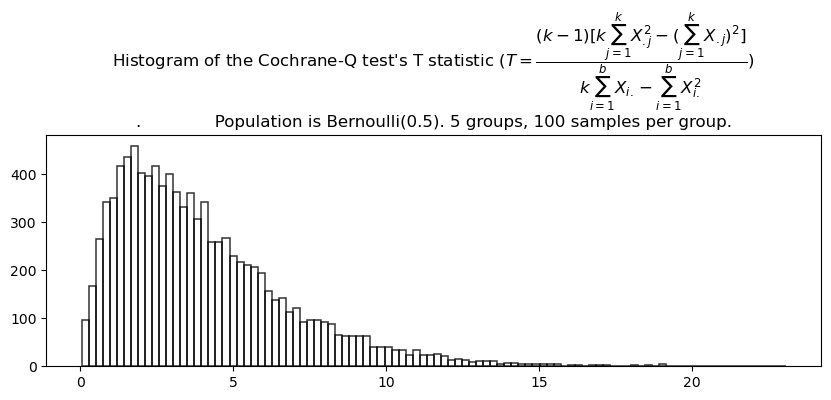

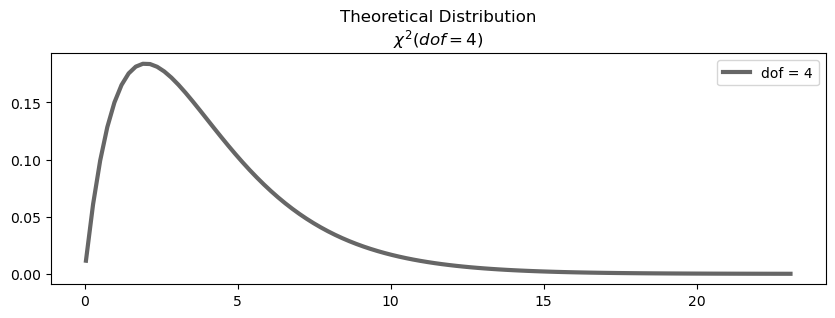

In [14]:
cochrane_q_test = Cochrane_Q_Test(p=0.5, k=5, n=100, N=10000)
cochrane_q_test.run(display=True)

## Hotelling's T2 test

https://encyclopediaofmath.org/wiki/Hotelling-T%5E2-distribution

The Hotelling's $T^{2}$ test compares the mean of two multivariate populations. Suppose we have two groups of samples from $N(\mu_{1},\sum)$ and $N(\mu_{2},\sum)$. They share the same covariance matrix $\sum$. The null hypothesis is $H_{0}:\mu_{1}=\mu_{2}$ and the test statistic is:

$T^{2} = n(\bar{x}-\mu)^{T}S^{-1}(\bar{x}-\mu)$

$S=\frac{1}{n-1}\sum_{i=1}^{n}(x_{i}-\bar{x})(x_{i}-\bar{x})^{T}$ is the grand covariance matrix.

If the dimensionality k=1, Hotelling's $T^{2}$ degenerates into the t distribution. When K ≥2, it is a multivariate generalization of the t distribution. The Hotelling_T2_Test verifies the $T^{2}$ sampling distribution.

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 531.46it/s]


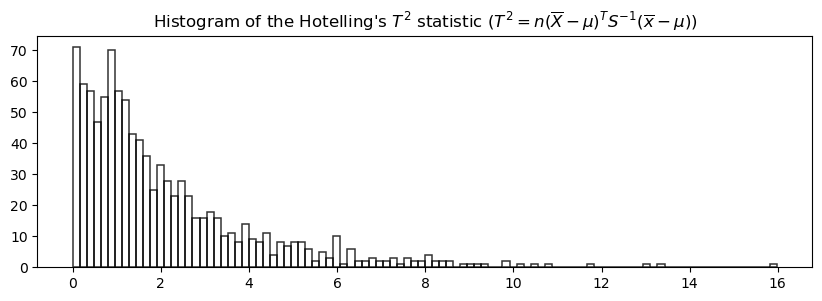

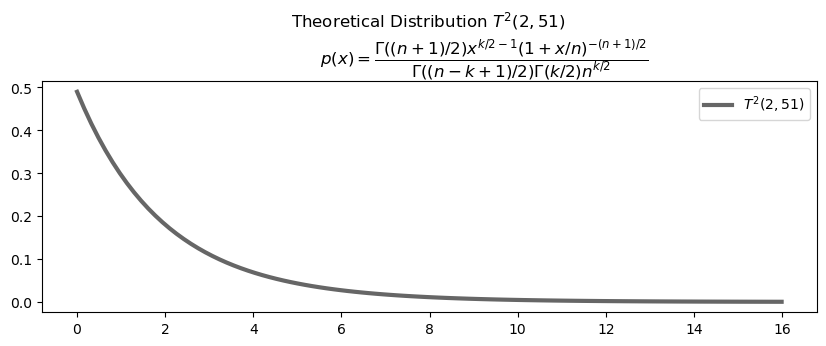

In [15]:
hotelling_t2_test = Hotelling_T2_Test(n=50, k=2, N=1000)
hotelling_t2_test.run(display=True)

## Fligner-Killeen test

There are several solutions to test for the equality (homogeneity) of variance across groups, including:

    F-test
    Bartlett’s test
    Levene’s test
    Fligner-Killeen test
    
    
The Fligner-Killeen test is one of them. It is a non-parametric test for homogeneity of group variances based on ranks. It is useful when the data are non-normally distributed or when problems related to outliers in the dataset cannot be resolved. It is also one of the many tests for homogeneity of variances which is most robust against departures from normality.
We now calculate the Fligner Killeen statistic using the formula 

$FK = \dfrac{\sum_{j=1}^{k}n_{j}(\overline{a_{j}}-\overline{a})^2}{s^2}$

where:
$k$ = the number of groups

$n_j$ = the size of the jth group

$\overline{a_{j}}$ = the mean of the normalization values for the $j^{th}$ group

$\overline{a}$ = the mean of all the normalization values

$s^2$ = the variance of all the normalization values

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1530.12it/s]


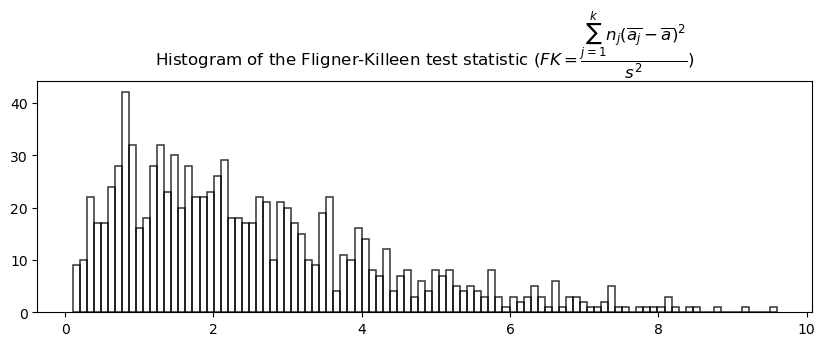

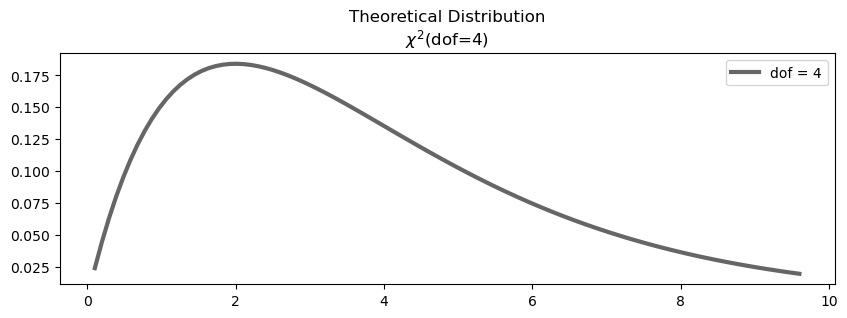

In [16]:
fk_test = Fk_Test(n=10, k=5, N=1000)
fk_test.run(display=True)

## Bartlett's Test

In statistics, Bartlett's test, named after Maurice Stevenson Bartlett, is used to test homoscedasticity, that is, if multiple samples are from populations with equal variances. Some statistical tests, such as the analysis of variance, assume that variances are equal across groups or samples, which can be verified with Bartlett's test. 

Bartlett's test is used to test the null hypothesis, $H_{0}$ that all k population variances are equal against the alternative that at least two are different.

If there are k samples with size $n_{i}$ and sample variances $S^{2}_{i}$ then Bartlett's test statistic is 

$\chi^2 = \dfrac{(N-k)\ln{(S_{P}^2)}-\sum_{i=1}^{k}(n_{i}-1)\ln{(S_{i}^2)}}{1+\dfrac{1}{3(k-1)}(\sum_{i=1}^{k}(\dfrac{1}{n_{i}-1})-\dfrac{1}{N-k})}$

where $N=\sum_{i=1}^{k}n_{i}$ and $S_{P}^{2}=\frac{1}{N-k}\sum_{i}(n_{i}-1)S_{i}^{2}$ is the pooled estimate for the variance. The test statistic has approximately a $\chi_{k-1}^{2}$ distribution. Thus, the null hypothesis is rejected if $\chi^{2}>\chi_{k-1,\alpha}^{2}$(where $\chi_{k-1,\alpha}^{2}$ is the upper tail critical value for the $\chi_{k-1}^{2}$ distribution).

Bartlett's test is a modification of the corresponding likelihood ratio test designed to make the approximation to the $\chi_{k-1}^{2}$ distribution better.

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 14702.93it/s]


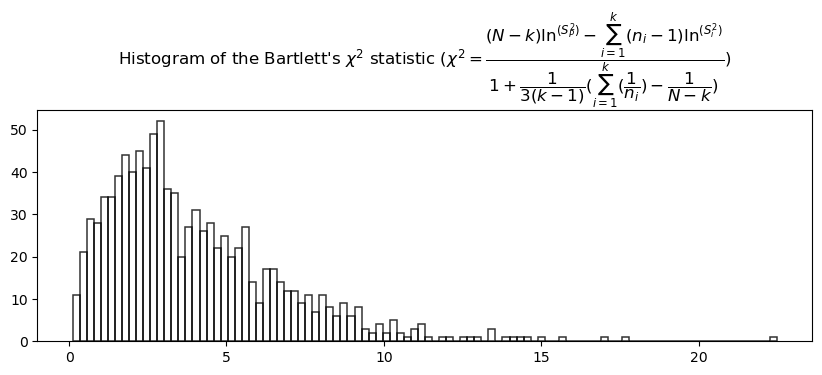

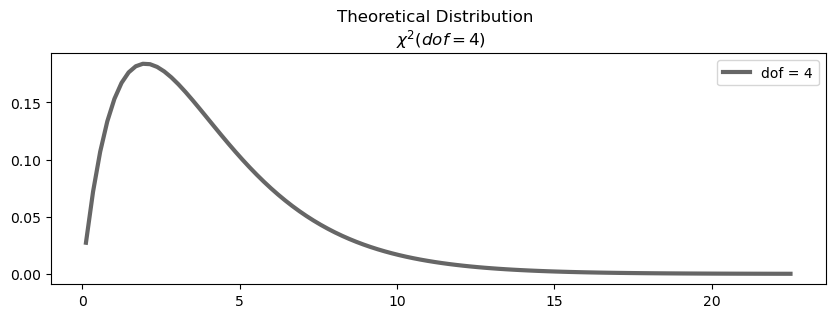

In [17]:
bartlett_test = Bartlett_Test(k=5, n=10, N=1000)
bartlett_test.run(display=True)

# package versions

In [18]:
import numpy
import pandas
import matplotlib
import time
import sklearn
import scipy
import IPython
import statsmodels
import mc

!python -V
print("IPython " + IPython.__version__)
print("numpy " + numpy.__version__)
print("sklearn " + sklearn.__version__)
print("scipy " + scipy.__version__)
print("statsmodels " + statsmodels.__version__)
print("matplotlib " + matplotlib.__version__)
print("mc-tk " + mc.__version__)

Python 3.9.13
IPython 8.16.1
numpy 1.22.0
sklearn 1.0.2
scipy 1.9.1
statsmodels 0.13.2
matplotlib 3.5.2
mc-tk 1.0.0


<br/><br/><br/><br/><br/><br/><br/><br/><hr/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

The following will be implemented in future versions.

## TODO: Levene's Test

Conover et al. (1981) examine many of the existing parametric and nonparametric tests by extensive simulations and they conclude that the tests proposed by Fligner and Killeen (1976) and Levene (1960) appear to be superior in terms of robustness of departures from normality and power

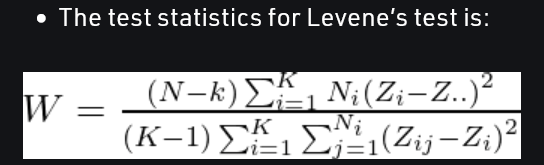

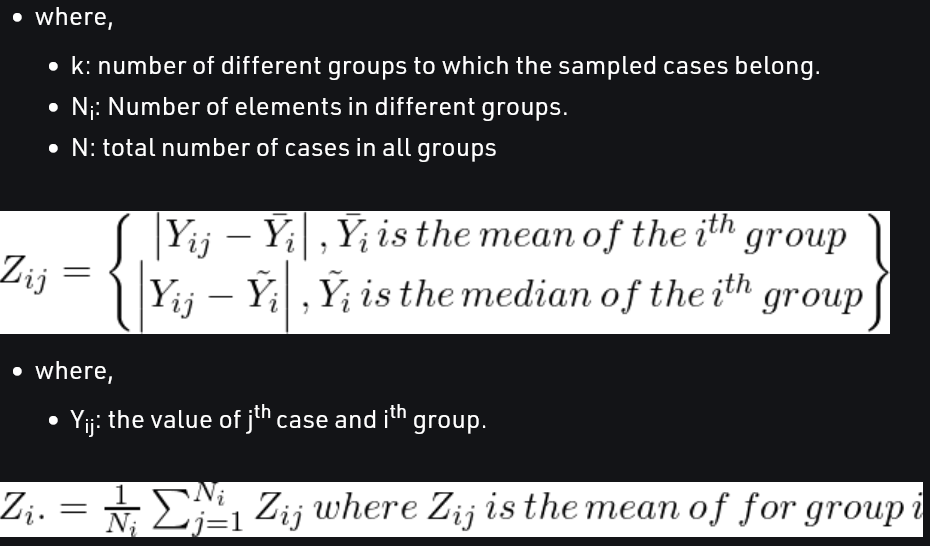

For skewed distribution, if the distribution is not clear we will use the median for test statistics.
For the symmetric distribution and moderately tailed distribution, we use mean value for distribution.

## TODO: Bartlett's Sphericity Test

Be aware that there are two tests that have Bartlett's name, and they are similar. The better-known test is Bartlett's test for equal variance, which is part of an ANOVA analysis. It tests the hypothesis that the variances across several groups are equal. The technical term is "homogeneity of variance," or HOV. The GLM procedure in SAS can perform Bartlett's test for homogeneity of variance. The documentation has a discussion and example that shows how to use Bartlett's HOV test.

Bartlett's sphericity test is different. Loosely speaking, the test asks whether a correlation matrix is the identity matrix. If so, the variables are uncorrelated, and you cannot perform a PCA to reduce the dimensionality of the data. More formally, Bartlett's sphericity test is a test of whether the data are a random sample from a multivariate normal population MVN(μ, Σ) where the covariance matrix Σ is a diagonal matrix. Equivalently, the variables in the population are MVN and uncorrelated. 

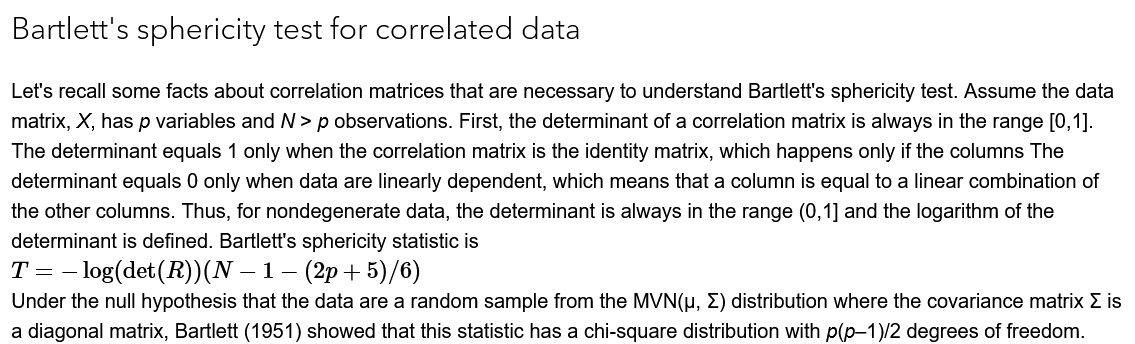

<hr/><br/><br/>